IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

    Mohamed Allaa Eddine BOUTALEB
    Wassim OUNI

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




## Exemples

In [1]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
import seaborn as sns
import graphviz as gv
import collections
from collections import defaultdict

import copy
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

In [2]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_synthese.columns


Index(['Code AGB', 'Code CIQUAL', 'Groupe d'aliment', 'Sous-groupe d'aliment',
       'Nom du Produit en Français', 'LCI Name', 'Saisonnalité',
       'Transport par avion (1 : par avion)', 'Livraison',
       'Matériau d'emballage', 'Préparation',
       'DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)',
       'Score unique EF (mPt/kg de produit)',
       'Changement climatique (kg CO2 eq/kg de produit)',
       'Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)',
       'Rayonnements ionisants (kBq U-235 eq/kg de produit)',
       'Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)',
       'Particules (E-06 disease inc./kg de produit)',
       'Acidification terrestre et eaux douces (mol H+ eq/kg de produit)',
       'Eutrophisation terreste (mol N eq/kg de produit)',
       'Eutrophisation eaux douces (E-03 kg P eq/kg de produit)',
       'Eutrophisation marine (E-03 kg N eq/kg de produit)',
       'Utilisation du sol (Pt/kg de p

In [3]:
data_synthese.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
5,13001,13001,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, sec","Apricot, pitted, dried",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.315730,0.041668,0.156978,1.036479,4.955795,248.627750,260.488540,7.717328,184.622520,11.016019


In [4]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_ingredient.columns
print("Nombre de lignes: ",len(data_ingredient))

Nombre de lignes:  5671


In [5]:
data_ingredient.loc[0:5]

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
5,24664,24664,Gâteau aux amandes type financier,produits céréaliers,gâteaux et pâtisseries,Almond cake,Amande,0.349367,0.914647,0.070591,...,0.098041,0.012824,0.046970,0.406947,4.767077,64.110420,49.548089,27.024469,11.359491,8.104749


In [6]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
data_etape.columns
print("Nombre de lignes: ",len(data_etape))

Nombre de lignes:  2480


In [7]:
data_etape.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
5,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",2.20,"Abricot, dénoyauté, cru (13000)",0.061101,0.000000,...,1.277733,0.000000,0.150130,0.533833,0.205231,0.006400,1.96,3.54,1.66,1.66


# 1. Introduction et définition de problématiques

<div class="alert alert-block alert-info">

**Dans le cadre de ce projet pour l'UE LU3IN026, nous allons faire une étude sur la base de données `agribalyse`.**

Avant de commencer, nous devons d'abord comprendre le contenu de cette base de données pour pouvoir mettre en évidence nos problématiques.

La base de données "agribalyse" offre trois fichiers .csv :

- Un fichier `synthèse` qui contient des informations détaillées sur les différents produits alimentaires, ainsi que des impacts environnementaux de ces derniers.

- Un fichier `ingredients` qui contient des informations détaillées sur les ingrédients de chaque produit alimentaire, ainsi que les mesures des impacts de chaque ingrédient sur l'environment.

- Un fichier `Etape` qui est similaire à "synthèse" mais qui contient les impactes sur l'environment pendant chaque étape de production d'un produit alimentaire.

**Notre analyse de cette base de donnée traitera deux formes d'apprentissage différentes :**

- L'apprentissage supervisé
- L'apprentissage non-supervisé


    
**La problématiques que nous avons décidé d'entamer est la suivante :**
    
<div class="alert alert-block alert-success">
<b>Peut-on savoir quel type (groupe) de produit alimentaire s'agit t'il à partir d'autres informations tel que l'impacte sur l'environnement?</b></div>
    
Nous allons alors faire :

- *1. Une analyse des performance et du taux de bonne classification (partie supervisé),   avec les différents Classifieurs que nous avons implementé pendant le semestre.*

    - Cela se fera en utilisant le fichier `data_synthèse.csv`
    - Nous allons fixer le `groupe d'aliments` comme **label_set**.
    - Nous allons chercher quelles sont les colonnes qui donnent les meilleurs taux de bonne classification pour pouvoir construit le **desc_set**.

    
- *2. Une étude et evaluation de clustering (partie non-supervisé) avec les différents algorithmes que nous avons implementé pendant le semestre.*
    
    - Cela se fera aussi avec le fichier `data_synthèse.csv` mais avec des échentillons de taille plus petite pour faire accélerer les calculs et obtenir des figures lisibles (plus précisemment pour la classification hièrarchique/dendrogramme).
    - Nous allons dans ce cas essayer de déterminer le nombre optimal des clusters, et essayer de comprendre sur quel critère sont regroupé les produits alimentaires.

    
- *3. Faire une étude supervisée/non-supervisée sur `data_etape.csv` en prenant comme colonnes soit tout les facteurs d'une même étape, soit le même facteur sur plusieurs étapes, et de comparer les résultats.*
    
    
- *4. Faire une étude supervisée sur `data_ingrédients.csv` pour savoir si les ingrédients nous aide à trouver le groupe alimentaire des produits ou non.* 
    
</div>    


# 2. Nettoyage de la base des données

## 2.1. Data Quality Ratio

**DQR (Data Quality Ratio)** est un atribut qui décrit la qualité de la donnée de chaque produit. Le guide d'`agribalyse` précise que l'utilisateur (nous) doit se méfier des produits avec un DQR supérieur à 3, et de favoriser les produits avec un DQR entre 1 et 3. Plus le DQR augmente, moins la donnée est fiable.


<font color="RED">**Pour cette raison, nous allons retirer les produits avec un `DQR > 3` pour la partie d'apprentissage, comme ça, nous allons faire apprendre les différents classifieurs avec des données considérées fiables.**</font>


Commençons à faire cela avec le fichier `synthèse`.


**Remarque : Pour le reste du projet, nous allons utilisé `data_synthese_fiable` au lieu de `data_synthese`**

In [8]:
# Removing all products with a DQR > 3

data_synthese_fiable = data_synthese.loc[data_synthese['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)']<=3]
data_synthese_fiable['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)']


print(data_synthese_fiable.shape)

(1683, 27)


## 2.2. Visualisation des données

A l'aide de **la méthode d'analyse par composantes principales**, nous allons réduire la dimension des données en 2D pour pouvoir les visualiser et avoire un idée de la distribution.

<div class="alert alert-block alert-info">
    On a choisi la colonne <b>Groupe d'aliment</b> comme <b>labelset</b> pour la visualisation.
</div>

In [29]:
np.random.seed(42)
random.seed(42)

nombre_colonnes = len(data_synthese_fiable.columns)

# Les noms des differents labels
labels_noms = data_synthese_fiable["Groupe d'aliment"].unique()

# Les colonnes qui vont servir comme caractèristiques des 'x' seront les colonnes qui décrivent l'impacte sur l'environement

X = np.array(data_synthese_fiable.iloc[:,12:])
Y = np.array(data_synthese_fiable.iloc[:,2])

print(Y)

['fruits, légumes, légumineuses et oléagineux'
 'fruits, légumes, légumineuses et oléagineux'
 'fruits, légumes, légumineuses et oléagineux' ...
 'lait et produits laitiers' 'lait et produits laitiers'
 'lait et produits laitiers']


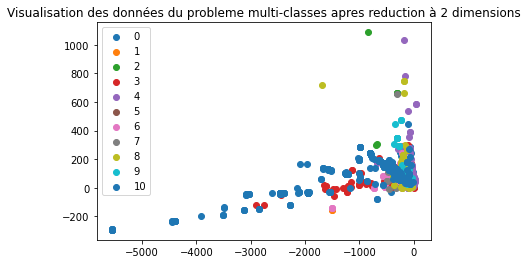

In [30]:
##################################################
#### Visualisation des données 
##################################################

valeurs, vecteurs = np.linalg.eig(X.T @ X)

SortedValues = copy.deepcopy(valeurs)
SortedValues.sort()

indV1 = np.where(valeurs == SortedValues[len(SortedValues)-1])[0]
indV2 = np.where(valeurs == SortedValues[len(SortedValues)-2])[0]

VecMax1 = vecteurs[:,indV1]
VecMax2 = vecteurs[:,indV2]

Xup1 = np.dot(X, VecMax1)
Xup2 = np.dot(X, VecMax2)

classes = np.unique(Y)

for i in classes :
    plt.scatter(Xup1[Y == i],Xup2[Y == i])

plt.title("Visualisation des données du probleme multi-classes apres reduction à 2 dimensions")
plt.legend(np.arange(11))

Malheureusement, la visualisation nous dit pas grand-chose, la grande majorité des données se concentrent à droite, avec quelques données qui se trouvent très loins des autres. 

## 2.3. Quelles sont les colonnes à retirer?

Il est clair que certaines colonnes dans le fichier `data_synthese.csv` ne vont pas servir à la classification ni au clustering, et cela sera pour des raisons différentes que nous allons élaborer maintenant : 


- **Code AGB et Code CIQUAL :**  Ces codes ne sont pas représentatifs de la nature produit (viande, fruit, boissons...) Nous pouvont trouver deux produits du meme groupe alimentaire mais avec des code très différents (38106 et 24041 par exemple)



- **Nom du produit FR/EN(LCI) :** Nous ne voyons pas l'interet de devinier le groupe alimentaire à partir du nom du produit dans le cadre de ce projet, meme si ça parrait amusant de deviner à quelle catégorie appartient du poulet... 🤔



- **Saisonnalité et Transport :** Ces deux attributs, malgré qu'il presentent des valeurs différentes au sein du fichier, ne sont pas intéressantes à prendre pour le `desc_set`, car la majorité des produits ont comme valeurs `Transport = 0` et `Saisonnalité = Mix de Consommation FR`. Du coup, ces deux derniers attributs ne vont pas servir à grande chose pour differencier entre les differents produits.

- **DQR :** Tout simplement parceque cet indice n'a rien à voir avec la nature du produit, c'est un indicateur de la qualité de donnée.

Nous n'allons pas utilisé ces colonnes dans notre étude.

# 3. Apprentissage supervisé

Le problème d'apprentissage supervisé fait l'hypothèse que nous avons déja un `label_set` prédefini, ce dernier servira après pour la mesure d'accuracy de nos différents classifieurs. Nous allons travailler avec `data_synthese.csv` et la colonne 2 `Groupe d'aliments` servira comme `label_set`.

## 3.1. Classifieur PERCEPTRON


On fait varier les colonnes : de la colonne 12 jusqu'à la colonne 28 pour savoir quels sont les indicateurs environnementaux (air / eau / ressources / sols) qui sont les plus pertinants pendant la classification des produits agricoles et alimentaires.



In [60]:
def label_num (df):
    df["Groupe d'aliment"].replace({"fruits, légumes, légumineuses et oléagineux": "0","viandes, œufs, poissons":"1","aides culinaires et ingrédients divers":"2","boissons":"3","entrées et plats composés":"4","produits céréaliers":"5","lait et produits laitiers":"6","produits sucrés":"7","glaces et sorbets":"8","matières grasses":"9","aliments infantiles":"10"}, inplace=True)
    return df


In [61]:
np.random.seed(42)
random.seed(42)

data_synthese_fiable = data_synthese.loc[data_synthese['DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)']<=3]
data_synthese_fiable_num = copy.deepcopy(data_synthese_fiable)
label_num(data_synthese_fiable_num)
nombre_colonnes = len(data_synthese_fiable_num.columns)

# Les noms des differents labels
labels_noms = data_synthese_fiable_num["Groupe d'aliment"].unique()

# Les colonnes qui vont servir comme caractèristiques des 'x' seront les colonnes qui décrivent l'impacte sur l'environement
#columns_noms = data_synthese_fiable.columns[11:columns]
X = np.array(data_synthese_fiable_num.iloc[:,12:])
Ytemp = np.array(data_synthese_fiable_num.iloc[:,2])
Y = Ytemp.astype(int)

In [62]:
data_synthese_fiable.loc[0:2]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064


In [63]:
data_synthese_fiable_num.loc[0:2]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,0,fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,0,fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,0,fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064


In [399]:
np.random.seed(42)
random.seed(42)

normalized_data = clust.normalisation(data_synthese_fiable_num.iloc[:,12:])

niter = 5
for nb in range (15):
    X = np.array(normalized_data.iloc[:,nb:])
    index = np.random.permutation(len(X))
    Xm = X[index]
    Ym = Y[index]
    perf = []
    perf2 = []

    for i in range(niter) :
        Xapp, Yapp, Xtest, Ytest = ut.crossval_strat(Xm, Ym, niter, i)
        perceptron = cl.ClassifierPerceptron(15-nb, 0.01)
        perceptron_MC = cl.ClassifierMultiOAA(15-nb, perceptron)
        perceptron_MC.train(Xapp, Yapp)
        perf.append(perceptron_MC.accuracy(Xapp, Yapp))
        perf2.append(perceptron_MC.accuracy(Xtest, Ytest))
       
    print("Train accuracy en utilisant les",15-nb,"premières colonnes à partir de DQR : ", sum(perf)/len(perf))
    print("Test accuracy en utilisant les",15-nb,"premières colonnes à partir de DQR : ", sum(perf2)/len(perf2))
    print("\n")

Train accuracy en utilisant les 15 premières colonnes à partir de DQR :  0.39392592592592596
Test accuracy en utilisant les 15 premières colonnes à partir de DQR :  0.3963963963963964


Train accuracy en utilisant les 14 premières colonnes à partir de DQR :  0.3764444444444444
Test accuracy en utilisant les 14 premières colonnes à partir de DQR :  0.372972972972973


Train accuracy en utilisant les 13 premières colonnes à partir de DQR :  0.3568888888888889
Test accuracy en utilisant les 13 premières colonnes à partir de DQR :  0.3591591591591592


Train accuracy en utilisant les 12 premières colonnes à partir de DQR :  0.37925925925925924
Test accuracy en utilisant les 12 premières colonnes à partir de DQR :  0.3771771771771772


Train accuracy en utilisant les 11 premières colonnes à partir de DQR :  0.41718518518518516
Test accuracy en utilisant les 11 premières colonnes à partir de DQR :  0.41501501501501503


Train accuracy en utilisant les 10 premières colonnes à partir de DQR : 


`Les performances sont très faibles, elles sont inférieures à 0.41, malgré la normalisation des données.` Le Perceptron n'est pas un bon modèle pour nos données car malgré la validation croisée, on obtient toujours des valeurs qui ne sont pas impressionantes. Puisque les valeurs d'accuracy sont assez faibles sur les différents échantillons pris par la validation croisée, cela signie que ce n'est pas la faute de la base des données, mais plutot le classifieur n'est pas optimisé pour cette dernière. Par ailleurs, on remarque aussi qu'il est préférable de prendre toutes les colonnes numériques qui décrivent l'impacte sur l'environement (de 12 à 28).


## 3.2. Classifieur KNN

Le classifieur KNN reste un classifieur classique et assez bon pour les problèmes multi-classes, mais très lent en terme de temps de calculs. 

On va faire varier ici **la valeur de k** pour trouver celle qui donne les meilleurs resultats en terme de taux de bonne classification. Chaque iteration va nous donner le taux de precision sur le `train_set` et le `test_set` générés par la validation croisée, et une visualisation approximative de la frontiere de decision apres reduction de dimensions.

k :  1  | accuracy :  [0.7987987987987988, 0.8108108108108109, 0.8318318318318318, 0.7957957957957958, 0.8198198198198198]
k :  3  | accuracy :  [0.7717717717717718, 0.7747747747747747, 0.7747747747747747, 0.7177177177177178, 0.8318318318318318]
k :  5  | accuracy :  [0.7207207207207207, 0.7087087087087087, 0.7147147147147147, 0.7747747747747747, 0.7417417417417418]
k :  7  | accuracy :  [0.7387387387387387, 0.6756756756756757, 0.7027027027027027, 0.6906906906906907, 0.7417417417417418]
k :  9  | accuracy :  [0.6756756756756757, 0.6696696696696697, 0.7177177177177178, 0.7027027027027027, 0.6846846846846847]
[4.057057057057057, 3.8708708708708706, 3.6606606606606604, 3.5495495495495497, 3.4504504504504503]
[1, 3, 5, 7, 9]
la meilleure valeur de k pour notre qui donne les meilleurs résultats =  1


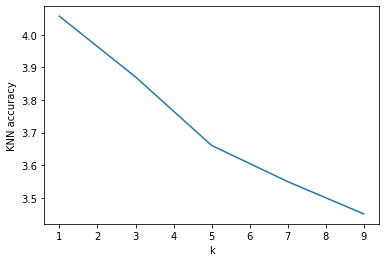

In [65]:
random.seed(42)
np.random.seed(42)

KNN_accuracies = []
valeurs_k = []
niter = 5
for k in range(1, 10, 2) :
    X = np.array(data_synthese_fiable_num.iloc[:,12:])
    index = np.random.permutation(len(X))
    Xm = X[index]
    Ym = Y[index]
    perf = []

    for i in range(niter) :
        Xapp, Yapp, Xtest, Ytest = ut.crossval_strat(Xm, Ym, niter, i)
        KNN = cl.ClassifierKNN(15, k)
        KNN_MC = cl.ClassifierMultiOAA(15, KNN)
        KNN_MC.train(Xapp, Yapp)
        perf.append(KNN_MC.accuracy(Xtest, Ytest))

    print("k : ", k, " | accuracy : ", perf)
    KNN_accuracies.append(sum(perf))
    valeurs_k.append(k)
print(KNN_accuracies)
print(valeurs_k)
meilleur_k=valeurs_k[KNN_accuracies.index(max(KNN_accuracies))]
print("la meilleure valeur de k pour notre qui donne les meilleurs résultats = ",meilleur_k)
plt.plot(valeurs_k, KNN_accuracies)  
plt.ylabel('KNN accuracy')
plt.xlabel("k")
plt.show()

On remarque ici que **k = 1** donne le meilleur taux de bonne classification sur les données test.

La valeur de k = 1 donne le meilleur taux de bonne classification sur les exemples de train, mais cela revient au problème du surapprentissage. On peut remarquer le probleme de surapprentissage. Le surapprentissage peut causer des problemes de classifications pour les données Test a cause des frontieres de decision instables et sensibles.

On remarque dans la courbe que les différentes accuracies sont très proches en variant k, donc on a choisi le meilleur k différent de 1. Generalement, On choisis un nombre impair comme valeur de k pour être sur qu'il y aura pas de conflits de décisions, donc **meilleur_k = 3**.

Le teste de plusieurs valeurs de k reste la methode la plus fiable. Il faut preciser que ce n'est pas la peine de tester trop de valeurs de K, car on peut remarquer dans la courbe tracée en haut que le taux de bonne classification commence a prendre la forme d'une fonction decroissante à partir de k = 1.

In [66]:
# ça prend du temps
nombre_colonnes = len(data_synthese_fiable_num.columns)
niter = 5
meilleur_k=3
for nb in range (12,28):
    X = np.array(data_synthese_fiable_num.iloc[:,nb:])
    index = np.random.permutation(len(X))
    Xm = X[index]
    Ym = Y[index]
    perf = []
    
    for i in range(niter) :
        Xapp, Yapp, Xtest, Ytest = ut.crossval_strat(Xm, Ym, niter, i)
        KNN = cl.ClassifierKNN(nombre_colonnes-nb, meilleur_k)
        KNN_MC = cl.ClassifierMultiOAA(nombre_colonnes-nb, KNN)
        KNN_MC.train(Xapp, Yapp)
        perf.append(KNN_MC.accuracy(Xtest, Ytest))

    print("Perf : ", perf)

Perf :  [0.7717717717717718, 0.7567567567567568, 0.7987987987987988, 0.7597597597597597, 0.7777777777777778]
Perf :  [0.7537537537537538, 0.8138138138138138, 0.7447447447447447, 0.7837837837837838, 0.7507507507507507]
Perf :  [0.7747747747747747, 0.7747747747747747, 0.7687687687687688, 0.7747747747747747, 0.7837837837837838]
Perf :  [0.8018018018018018, 0.7807807807807807, 0.7537537537537538, 0.7657657657657657, 0.7327327327327328]
Perf :  [0.7537537537537538, 0.7927927927927928, 0.7297297297297297, 0.7747747747747747, 0.7747747747747747]
Perf :  [0.7837837837837838, 0.7897897897897898, 0.7237237237237237, 0.7627627627627628, 0.7777777777777778]
Perf :  [0.7387387387387387, 0.7807807807807807, 0.7837837837837838, 0.7867867867867868, 0.7777777777777778]
Perf :  [0.7567567567567568, 0.7387387387387387, 0.7687687687687688, 0.7657657657657657, 0.7477477477477478]
Perf :  [0.7627627627627628, 0.7867867867867868, 0.7777777777777778, 0.7627627627627628, 0.7327327327327328]
Perf :  [0.74474474

## 3.3. Arbre numérique

<div class="alert alert-block alert-success">
L'arbre numérique est un classifieur adéquat pour cette base de données, il permettra de trouver des seuils de coupure sur les différentes colonnes qui décrivent l'impacte sur l'environement, à fin de trouver le label correspondant (qui est le groupe d'aliments pour notre étude).

**Donc, nous allons :**
- Prendre toutes les colonnes qui décrivent l'impacte sur l'environnement (à partir de la colonne 12 jusqu'a la dernière colonne) pour former le `desc_set`
- Prendre la colonne 2 (Groupe d'aliments) pour former le `label_set`


Nous allons faire varier l'entropie de **0.1** à **1.00**, et nous mesurerons les différents taux de bonne classification sur :
- Le training-set 
- Le test-set
Ces deux derniers seront générés à partir de la fonction de validation croisée `crossval_strat`


Nous allons aussi citer les **5 attributs les plus discriminants** pendant la création de l'arbre, pour cela, nous allons faire passer une liste `att_disc` comme parametre dans la méthode de train pour récuperer le nom d'attribut utilisé pour la coupure à chaque itération.
<\div>



In [400]:
np.random.seed(42)
random.seed(42)

# Les noms des differents labels
labels_noms = data_synthese_fiable["Groupe d'aliment"].unique()
lines, columns = data_synthese_fiable.shape

# Les colonnes qui vont servir comme caractèristiques des 'x' seront les colonnes qui décrivent l'impacte sur l'environement
columns_noms = data_synthese_fiable.columns[12:columns]

X = np.array(data_synthese_fiable.iloc[:,12:columns])
Y = np.array(data_synthese_fiable.iloc[:,2])

index = np.random.permutation(len(X)) # mélange des index

Xm = X[index]
Ym = Y[index]

# Création du training set et du test set avec la crossvalidation
niter = 10

# Recupération des noms des attributs les plus discriminants à chaque étape

acc_num = [] # list of Average training set accuracy per entropy value
tacc_num = [] # list of Average test set accuracy per entropy value

for entropie in np.arange(0.1, 1, 0.1) :
    
    att_disc = []
    train_acc = []
    test_acc =  []  
    
    for i in range(niter) :
        desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm, Ym, niter, i)
        arbre_synthese = cl.ClassifierArbreNumerique(len(columns_noms), entropie, columns_noms)
        arbre_synthese.train(desc_set,label_set, att_disc)
        train_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(desc_set,label_set))))
        test_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(tdesc_set,tlabel_set))))

    print("\n***********************************************")
    print("Perf for entropie =  ", float("{0:.1f}".format(entropie)), " :")
    
    #print("Accuracies of training set : ", train_acc)
    #print("Accuracies of test set : ", test_acc)
    
    print("Average accuracy of training set : ", sum(train_acc)/len(train_acc))
    print("Average accuracy of test set : ", sum(test_acc)/len(test_acc))
    
    acc_num.append(sum(train_acc)/len(train_acc))
    tacc_num.append(sum(test_acc)/len(test_acc))
    
    
    print("\n The five most used attributs for the tree splitting (in order): ")
    print("\tFormat (Attribute name, Number of times used to split the tree)")
    
    counter=collections.Counter(att_disc)
    i = 1
    for elt in counter.most_common(5):
        print("\t",i ," - ", elt)
        i+=1
        

    print("\n*********************************************************************")



***********************************************
Perf for entropie =   0.1  :
Average accuracy of training set :  0.9945999999999999
Average accuracy of test set :  0.8372300000000001

 The five most used attributs for the tree splitting (in order): 
	Format (Attribute name, Number of times used to split the tree)
	 1  -  ('Score unique EF (mPt/kg de produit)', 641)
	 2  -  ('Rayonnements ionisants (kBq U-235 eq/kg de produit)', 232)
	 3  -  ('Changement climatique (kg CO2 eq/kg de produit)', 200)
	 4  -  ("Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)", 152)
	 5  -  ('Épuisement des ressources eau (m3 depriv./kg de produit)', 109)

*********************************************************************

***********************************************
Perf for entropie =   0.2  :
Average accuracy of training set :  0.9838000000000001
Average accuracy of test set :  0.8408900000000001

 The five most used attributs for the tree splitting (in order): 
	Format (Attri

In [402]:
################################################################################################################
# OPTIONNEL : Affichage de l'arbre créé, veuillez décommentez les lignes suivantes si vous souhaitez voir l'arbre
################################################################################################################


'''
for i in range(niter) :
        desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm, Ym, niter, i)
        arbre_synthese = cl.ClassifierArbreNumerique(len(columns_noms), 0.1, columns_noms)
        arbre_synthese.train(desc_set,label_set, att_disc)
        train_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(desc_set,label_set))))
        test_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(tdesc_set,tlabel_set))))

graphe_arbre_synthese = gv.Digraph(format='png')
arbre_synthese.affiche(graphe_arbre_synthese)

#Affichage du graphe obtenu:
graphe_arbre_synthese
'''


'\nfor i in range(niter) :\n        desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm, Ym, niter, i)\n        arbre_synthese = cl.ClassifierArbreNumerique(len(columns_noms), 0.1, columns_noms)\n        arbre_synthese.train(desc_set,label_set, att_disc)\n        train_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(desc_set,label_set))))\n        test_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(tdesc_set,tlabel_set))))\n\ngraphe_arbre_synthese = gv.Digraph(format=\'png\')\narbre_synthese.affiche(graphe_arbre_synthese)\n\n#Affichage du graphe obtenu:\ngraphe_arbre_synthese\n'

**Il est clair que plus on augmente la valeur d'entropie, moins les resultats sont bons. Voici le graphe qui décrit cela :**

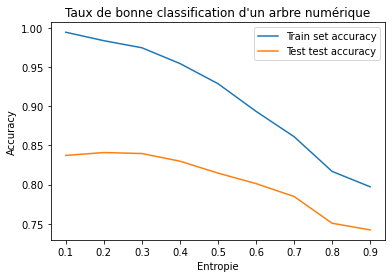

In [403]:
# train and test accuracy plot lines
entropies = [e for e in np.arange(0.1, 1, 0.1)]
plt.plot(entropies, acc_num, label = "Train set accuracy")
plt.plot(entropies, tacc_num, label = "Test test accuracy")
plt.xlabel("Entropie")
plt.ylabel("Accuracy")
plt.title("Taux de bonne classification d'un arbre numérique")
plt.legend()
plt.show()

Il parait que la valeur d'entropie qui donne les meilleurs résultats de bonne classification sur le jeu de données de **test** est `entropie = 0.2`. la valeur `entropie = 0.1` reste une bonne valeur aussi. Il faut alors eviter les valeurs d'entropie trop élevées et bien evidemment celles qui sont trop petites **(risque de surapprentissage et création d'un arbre trop complexe)**

**Commentaires sur les attributs les plus discriminants** :

Nous avons récupéré une liste qui contient les attributs séléctionnés à chaque fois pour faire la discrétisation. Nous pouvons remarquer que l'attribut `Score unique EF` était l'attribut le plus utilisé par le classifieur d'arbre numérique pendant l'apprentissage, avec une fréquence de **582** pour `entropie = 0.2`. Cela veut dire que cet attribut contient des valeurs assez variées pour pouvoir séparer entre les différents produits selon le groupe alimentaire. L'attribut `Rayonnements ionisants` prend la deuxième place pour toutes les versions d'entropie que nous avons testé.

## 3.4. Arbre catégoriel

**Nous allons maintenant essayer la classification à l'aide d'un arbre catégoriel.** Nous allons considérer des colonnes différentes comme attributs pour les exemples. Ces colonnes vont etre de nature **catégorielle et non pas numérique.**

Cependant, voici les colonnes qui seront utilisées :

- Livraison
- Matériaux d'emballage
- Préparation.

Comme dans l'arbre numérique, nous allons faire varier epsilon de **0.1** à **1.00**, et nous mesurerons les différents taux de bonne classification sur :
- Le training-set 
- Le test-set
    
    
Ces deux derniers seront générés, encore une fois, à partir de la fonction de validation croisée `crossval_strat`


Nous allons aussi citer les **3 attributs les plus discriminants** pendant la création de l'arbre, puiqu'il y a que 3 attributs ici. Cela nous permettra de savoir quels sont les colonnes qui servent vraiment à la classification.



***********************************************
Perf for epsilon =   0.1  :
Accuracies of training set :  [0.8953, 0.8927, 0.894, 0.898, 0.8947, 0.8953, 0.894, 0.8953, 0.8934, 0.896]
Accuracies of test set :  [0.872, 0.8963, 0.872, 0.8354, 0.8841, 0.8598, 0.8841, 0.878, 0.8841, 0.8598]
Average accuracy of training set :  0.89487
Average accuracy of test set :  0.87256

 The three most used attributs for the tree splitting (in order): 
	Format (Attribute name, Number of times used to split the tree)
	 1  -  ('Livraison', 334)
	 2  -  ('Préparation', 151)
	 3  -  ("Matériau d'emballage", 57)
***********************************************


***********************************************
Perf for epsilon =   0.2  :
Accuracies of training set :  [0.8953, 0.892, 0.894, 0.898, 0.8934, 0.8953, 0.894, 0.8947, 0.8934, 0.896]
Accuracies of test set :  [0.872, 0.8902, 0.872, 0.8354, 0.8841, 0.8598, 0.8841, 0.872, 0.8841, 0.8598]
Average accuracy of training set :  0.8946100000000001
Average acc

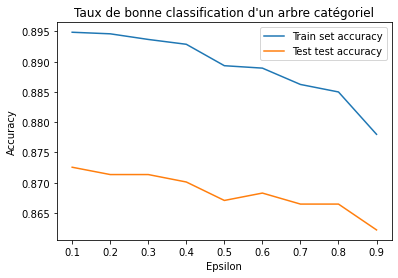

In [15]:
np.random.seed(42)
random.seed(42)

# Les noms des differents labels
labels_noms = data_synthese_fiable["Groupe d'aliment"].unique()
lines, columns = data_synthese_fiable.shape

# Les colonnes qui vont servir comme caractèristiques des 'x' seront les colonnes qui décrivent l'impacte sur l'environement
columns_noms = data_synthese_fiable.columns[8:11]

X = np.array(data_synthese_fiable.iloc[:,8:11])
Y = np.array(data_synthese_fiable.iloc[:,2])

index = np.random.permutation(len(X)) # mélange des index

Xm = X[index]
Ym = Y[index]

# Création du training set et du test set avec la crossvalidation
niter = 10

acc_cat = []
tacc_cat = []

for epsilon in np.arange(0.1, 1, 0.1) :
    att_disc = []
    train_acc = []
    test_acc =  []    
    for i in range(niter) :
        desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm, Ym, niter, i)
        arbre_synthese = cl.ClassifierArbreDecision(len(columns_noms), epsilon, columns_noms)
        arbre_synthese.train(desc_set,label_set,att_disc)
        train_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(desc_set,label_set))))
        test_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(tdesc_set,tlabel_set))))

    print("\n***********************************************")
    print("Perf for epsilon =  ", float("{0:.1f}".format(epsilon)), " :")
    print("Accuracies of training set : ", train_acc)
    print("Accuracies of test set : ", test_acc)
    print("Average accuracy of training set : ", sum(train_acc)/len(train_acc))
    print("Average accuracy of test set : ", sum(test_acc)/len(test_acc))
    
    print("\n The three most used attributs for the tree splitting (in order): ")
    print("\tFormat (Attribute name, Number of times used to split the tree)")
    
    counter=collections.Counter(att_disc)
    i = 1
    for elt in counter.most_common(3):
        print("\t",i ," - ", elt)
        i+=1
        
    print("***********************************************\n")
    
    acc_cat.append(sum(train_acc)/len(train_acc))
    tacc_cat.append(sum(test_acc)/len(test_acc))
    
    
# Affichage de l'evolution d'accuracy selon la valeur d'epsilon 
epsilons = [epsilon for epsilon in np.arange(0.1, 1, 0.1)]
plt.plot(epsilons, acc_cat, label = "Train set accuracy")
plt.plot(epsilons, tacc_cat, label = "Test test accuracy")
plt.xlabel("Epsilon")
plt.ylabel("Accuracy")
plt.title("Taux de bonne classification d'un arbre catégoriel")
plt.legend()
plt.show()


Index(['Livraison', 'Matériau d'emballage', 'Préparation'], dtype='object')


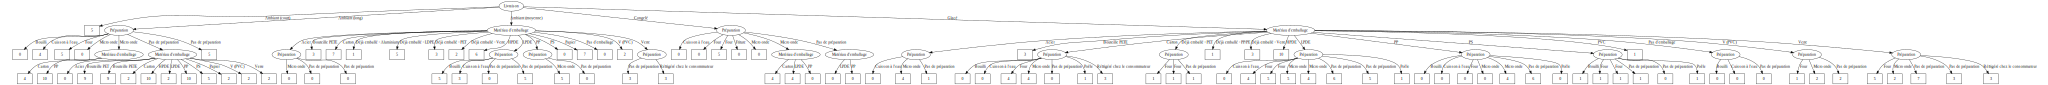

In [35]:
################################################################################################################
# OPTIONNEL : Affichage de l'arbre créé, veuillez décommentez les lignes suivantes si vous souhaitez voir l'arbre
################################################################################################################

desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm, Ym, niter, 0)
arbre_synthese = cl.ClassifierArbreDecision(len(columns_noms), 0.1, columns_noms)
arbre_synthese.train(desc_set,label_set)

graphe_arbre_synthese = gv.Digraph(format='png')
arbre_synthese.affiche(graphe_arbre_synthese)

#Affichage du graphe obtenu:
graphe_arbre_synthese



Il parait que la valeur d'epsilon qui donne les meilleurs résultats de bonne classification sur le jeu de données de **test** est `epsilon = 0.1`. la valeur `epsilon = 0.2` reste une bonne valeur aussi. Il faut alors eviter les valeurs d'epsilon trop élevées et bien evidemment celles qui sont trop petites, tout comme l'entropie pour les arbres numériques.

**Commentaires sur les attributs les plus discriminants** :

Nous avons récupéré une liste qui contient les attributs séléctionnés à chaque fois pour faire la discrétisation. Nous pouvons remarquer que l'attribut `Livraison` était l'attribut le plus utilisé par le classifieur d'arbre catégoriel pendant l'apprentissage, avec une fréquence de **334** pour `epsilon = 0.1`. En consultant, on remarque que c'est un attribut assez puissant, qui peut eliminer déja tout **les produits céréaliers** dès le début, en passant par la branche `Livraison = Ambiant (court)`. Cet attribut est après suivi par `Préparation` et `Matériaux d'emballage`.

Nous avons essayé de retirer un ou deux des trois attributs pour voir si les performances vont diminuer ou rester les memes, mais il parait que les trois attributs ont un impacte positif sur la classification. C'est déja une bonne nouvelle! Ils n'occupent pas d'espace pour rien.

## 3.5. Arbre Catégoriel + Numérique (One Hot Encoding)


**Et si on combine les deux?** Nous avons remarqué que les attributs d'impacte sur l'environnement ainsi que les attributs catégoriels donnent tous les deux des résultats assez bons, et pour cela, nous avons décidé de combiner LES DEUX!

Pour cela, nous allons utiliser <font color="GREEN">**l'ENCODAGE ONE HOT (OHE)**</font>

Nous avons definit une fonction `one_hot_encoder` qui prend en paramètre un `numpy array` contenant des colonnes de valeur numérique et/ou des colonnes de valeur catégorielle, cette fonction nous rend un nouveau `numpy array` ou les colonnes catégorielles ont été **supprimées** et **remplacées** par **autant de colonnes numériques que des valeurs catégorielles.** Cela a été fait grace à la méthode `pd.get_Dummies()`


Cependant, nous allons utiliser un arbre numérique qui va prendre le nouveau jeu de données encodé en **ONE HOT**.

    
Nous allons tester deux cas :
    
    
- Un jeu de données avec comme colonnes : **Livraison, Préparation, Matérieaux d'emballage + Tous les facteurs d'impacte sur l'environnement**
- Un jeu de données avec comme colonnes : **Livraison, Préparation, Matérieaux d'emballage + Score Unique EF**
    
<font color="RED">**REMARQUE : Lors de la création de l'arbre, il faut faire attention aux dimensions, car le nombre de colonnes va augmenter après l'encodage, nous allons cependant se débarasser du paramètre `LNoms` car il y aura des nouvelles colonnes dont il est inutile de recuperer le nom.**</font>

    

In [406]:
############################################################################################################
# COLONNES PRISES : Livraison, Préparation, Matérieaux d'emballage + Tous les facteurs d'impacte environnemental
############################################################################################################

np.random.seed(42)
random.seed(42)

# Les noms des differents labels
labels_noms = data_synthese_fiable["Groupe d'aliment"].unique()
lines, columns = data_synthese_fiable.shape

columns_noms = list(data_synthese_fiable.columns[8:11]) +  list(data_synthese_fiable.columns[12:])

X = np.array(data_synthese_fiable.iloc[:,8:])
X = np.delete(X,3,1) # Delete DQR column

Y = np.array(data_synthese_fiable.iloc[:,2])

index = np.random.permutation(len(X)) # mélange des index

Xm = X[index]
Ym = Y[index]
Xm_ohe = cl.one_hot_encoder(Xm) # <------------------ IMPORTANT LINE!

acc_nc_all = []
tacc_nc_all = []


# Création du training set et du test set avec la crossvalidation
niter = 10

for entropie in np.arange(0.1, 1, 0.1) :
    train_acc = []
    test_acc =  []    
    for i in range(niter) :

        desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm_ohe, Ym, niter, i)
                    
        arbre_synthese = cl.ClassifierArbreNumerique(desc_set.shape[1], entropie, []) # <------------------ IMPORTANT LINE!
        one_hot_desc = arbre_synthese.train(desc_set,label_set)
        train_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(desc_set,label_set))))
        test_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(tdesc_set,tlabel_set))))

    print("\n***********************************************")
    print("Perf for entropie =  ", float("{0:.1f}".format(entropie)), " :")
    print("Accuracies of training set : ", train_acc)
    print("Accuracies of test set : ", test_acc)
    print("Average accuracy of training set : ", sum(train_acc)/len(train_acc))
    print("Average accuracy of test set : ", sum(test_acc)/len(test_acc))
    print("***********************************************\n")
    
    acc_nc_all.append(sum(train_acc)/len(train_acc))
    tacc_nc_all.append(sum(test_acc)/len(test_acc))


***********************************************
Perf for entropie =   0.1  :
Accuracies of training set :  [0.9954, 0.9934, 0.9941, 0.9928, 0.9934, 0.9941, 0.9947, 0.9961, 0.9941, 0.9928]
Accuracies of test set :  [0.8963, 0.9146, 0.8902, 0.9146, 0.9329, 0.9207, 0.9268, 0.9085, 0.878, 0.9146]
Average accuracy of training set :  0.9940900000000001
Average accuracy of test set :  0.9097199999999999
***********************************************


***********************************************
Perf for entropie =   0.2  :
Accuracies of training set :  [0.9862, 0.9816, 0.9855, 0.9855, 0.9822, 0.9895, 0.9849, 0.9895, 0.9862, 0.9882]
Accuracies of test set :  [0.8902, 0.8963, 0.8841, 0.8963, 0.9268, 0.9207, 0.9207, 0.9024, 0.8902, 0.9085]
Average accuracy of training set :  0.9859300000000001
Average accuracy of test set :  0.9036199999999999
***********************************************


***********************************************
Perf for entropie =   0.3  :
Accuracies of trainin

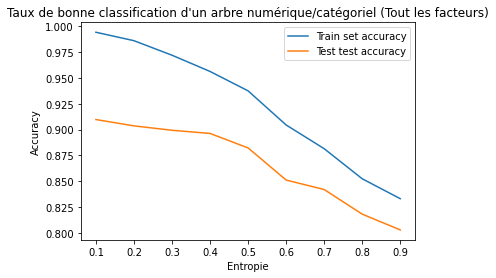

In [407]:
# Affichage de l'evolution d'accuracy selon la valeur d'entropie 

entropies = [e for e in np.arange(0.1, 1, 0.1)]
plt.plot(epsilons, acc_nc_all, label = "Train set accuracy")
plt.plot(epsilons, tacc_nc_all, label = "Test test accuracy")
plt.xlabel("Entropie")
plt.ylabel("Accuracy")
plt.title("Taux de bonne classification d'un arbre numérique/catégoriel (Tout les facteurs)")
plt.legend()
plt.show()

Nous remarquons ici que `entropie = 0.1` donne un taux de bonne classification de valeur `0.91`, une valeur supérieure à toutes les valeurs d'accuracy des deux types d'arbres précédents. Cette valeur n'est pas seule, nous trouvons un taux supérieur à `0.90` pour `entropie = 0.2` et `entropie = 0.3`.

Cela est du au fait que les colonnes catégorielles que nous avons ajouté en plus des colonnes numériques de l'impacte sur l'environnement ont amélioré la classification, avec un impacte négligeable sur la performance (les colonnes catégorielles n'augmentent pas trop le temps de calcul).


**Maintenant, essayons de refaire les calculs, mais avec la colonne `SCORE UNIQUE EF` seulement, puisque c'est mentionné dans le guide d'agrybalise que c'est un facteur calculé d'une manière pondérée à partir des facteurs qui se trouvent dans les colonnes qui suivent.** 

In [408]:
############################################################################################################
# COLONNES PRISES : Livraison, Préparation, Matérieaux d'emballage + SCORE UNIQUE EF
############################################################################################################

np.random.seed(42)
random.seed(42)

# Les noms des differents labels
labels_noms = data_synthese_fiable["Groupe d'aliment"].unique()
lines, columns = data_synthese_fiable.shape

# Les colonnes qui vont servir comme caractèristiques des 'x' seront la colonne du score unique EF
# et les colonnes utilisées pour l'arbre catégoriel

columns_noms = list(data_synthese_fiable.columns[8:11]) +  list(data_synthese_fiable.columns[12])

X = np.array(data_synthese_fiable.iloc[:,8:13])
X = np.delete(X,3,1) # Delete DQR column

Y = np.array(data_synthese_fiable.iloc[:,2])

index = np.random.permutation(len(X)) # mélange des index

Xm = X[index]
Ym = Y[index]
Xm_ohe = cl.one_hot_encoder(Xm)


# Création du training set et du test set avec la crossvalidation
niter = 10

acc_nc = []
tacc_nc = []

for entropie in np.arange(0.1, 1, 0.1) :
    train_acc = []
    test_acc =  []    
    for i in range(niter) :

        desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm_ohe, Ym, niter, i)
                    
        arbre_synthese = cl.ClassifierArbreNumerique(desc_set.shape[1], entropie, []) # <------------------ IMPORTANT LINE!
        one_hot_desc = arbre_synthese.train(desc_set,label_set)
        train_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(desc_set,label_set))))
        test_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(tdesc_set,tlabel_set))))

    print("\n***********************************************")
    print("Perf for entropie =  ", float("{0:.1f}".format(entropie)), " :")
    print("Accuracies of training set : ", train_acc)
    print("Accuracies of test set : ", test_acc)
    print("Average accuracy of training set : ", sum(train_acc)/len(train_acc))
    print("Average accuracy of test set : ", sum(test_acc)/len(test_acc))
    print("***********************************************\n")
    
    
    acc_nc.append(sum(train_acc)/len(train_acc))
    tacc_nc.append(sum(test_acc)/len(test_acc))


***********************************************
Perf for entropie =   0.1  :
Accuracies of training set :  [0.9934, 0.9954, 0.9961, 0.9941, 0.9947, 0.9947, 0.9941, 0.9947, 0.9961, 0.9947]
Accuracies of test set :  [0.9329, 0.9451, 0.9207, 0.9329, 0.9085, 0.939, 0.9085, 0.9207, 0.8963, 0.9573]
Average accuracy of training set :  0.9948
Average accuracy of test set :  0.9261900000000001
***********************************************


***********************************************
Perf for entropie =   0.2  :
Accuracies of training set :  [0.9868, 0.9868, 0.9862, 0.9855, 0.9849, 0.9842, 0.9835, 0.9855, 0.9855, 0.9868]
Accuracies of test set :  [0.9146, 0.939, 0.9085, 0.9268, 0.9085, 0.939, 0.9085, 0.9268, 0.9024, 0.9573]
Average accuracy of training set :  0.9855700000000001
Average accuracy of test set :  0.9231399999999998
***********************************************


***********************************************
Perf for entropie =   0.3  :
Accuracies of training set :  [0.97

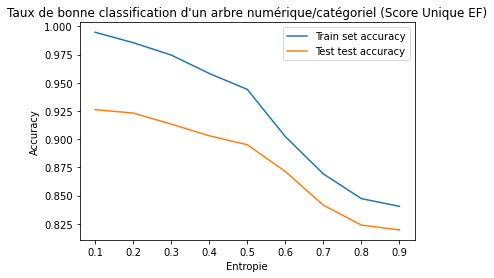

In [409]:
# Affichage de l'evolution d'accuracy selon la valeur d'entropie 

entropies = [e for e in np.arange(0.1, 1, 0.1)]
plt.plot(epsilons, acc_nc, label = "Train set accuracy")
plt.plot(epsilons, tacc_nc, label = "Test test accuracy")
plt.xlabel("Entropie")
plt.ylabel("Accuracy")
plt.title("Taux de bonne classification d'un arbre numérique/catégoriel (Score Unique EF)")
plt.legend()
plt.show()

A notre surprise, le fait d'inclure que `SCORE UNIQUE EF` seulement, donne **des resultats encore plus élevées que d'inclure le tout, avec un temps de calcul beaucoup plus faible et une dimension beaucoup plus réduite.** Cela confirme bien que le score unique joue le role d'une synthèse sur tout les autres facteurs, en méttant en évidece certain facteurs par rapport aux autres. 

<div class="alert alert-block alert-success">
Faisons maintenant une comparaison entre les différents arbres vus jusqu'à maintenant :

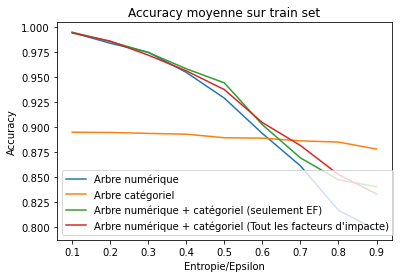

In [410]:
# train accuracy plot lines
entropies = [e for e in np.arange(0.1, 1, 0.1)]
plt.plot(entropies, acc_num, label = "Arbre numérique")
plt.plot(entropies, acc_cat,  label = "Arbre catégoriel")
plt.plot(entropies, acc_nc , label = "Arbre numérique + catégoriel (seulement EF)")
plt.plot(entropies, acc_nc_all, label = "Arbre numérique + catégoriel (Tout les facteurs d'impacte)")
plt.xlabel("Entropie/Epsilon")
plt.ylabel("Accuracy")
plt.title("Accuracy moyenne sur train set")
plt.legend()
plt.show()

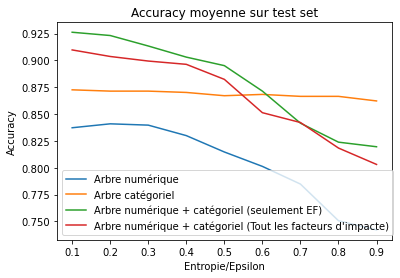

In [411]:
# test accuracy plot lines
entropies = [e for e in np.arange(0.1, 1, 0.1)]
plt.plot(entropies, tacc_num, label = "Arbre numérique")
plt.plot(entropies, tacc_cat,  label = "Arbre catégoriel")
plt.plot(entropies, tacc_nc , label = "Arbre numérique + catégoriel (seulement EF)")
plt.plot(entropies, tacc_nc_all, label = "Arbre numérique + catégoriel (Tout les facteurs d'impacte)")
plt.xlabel("Entropie/Epsilon")
plt.ylabel("Accuracy")
plt.title("Accuracy moyenne sur test set")
plt.legend()
plt.show()

Les classifieurs donnent des taux de bonne classification **(Plus grand -> Plus petit)** dans cet ordre :
- Arbre numérique + catégoriel (seulement Score EF)
- Arbre numérique + catégoriel (Tout les facteurs)
- Arbre catégoriel
- Arbre numérique (Tout les facteurs)

**L'accuracy du train_set est egale à presque 1 pour tous les classifieurs, sauf l'arbre catégoriel. Ceci revient au bon apprentissage lors de l'introduction des attributs de valeurs numériques (qui sont beaucoup plus précises que les valeurs catégorielles.**


**Plus l'entropie augmente, moins bon est l'accuracy.**


## 3.6. Bagging Tree

Nous allons maintenant evaluer les resultats etudiés précédemment à l'aide du classifieur Bagging Tree. Nous allons tirer aleatoirement un echantillon de produits à partir de la base d'apprentissage, cet echantillon sert à construire un classifieur. Dans l'algorithme de Bagging, ce processus est répété B fois, **B etant un hyper-parametre.**

**<font color="GREEN">Nous avons légerement modifé le code de ClassifierBaggingTree pour qu'il soit capable de traiter les problemes Multi-Classes comme celui-ci, cela nécessitait une généralisation au niveau de la methode `Predict` en utilisant un `dict`.</font>**


**<font color="RED">Pour ce classifieur, nous allons utiliser le jeu de données encodé en ONE HOT (Score Unique EF uniquement), puisque c'est le jeu qui a donné les meilleurs résultats</font>**

In [58]:
np.random.seed(42)
random.seed(42)

# Les noms des differents labels
labels_noms = data_synthese_fiable["Groupe d'aliment"].unique()
lines, columns = data_synthese_fiable.shape

# Les colonnes qui vont servir comme caractèristiques des 'x' seront la colonne du score unique EF
# et les colonnes utilisées pour l'arbre catégoriel

columns_noms = list(data_synthese_fiable.columns[8:11]) +  list(data_synthese_fiable.columns[12])

X = np.array(data_synthese_fiable.iloc[:,8:13])
X = np.delete(X,3,1) # Delete DQR column

Y = np.array(data_synthese_fiable.iloc[:,2])

index = np.random.permutation(len(X)) # mélange des index

Xm = X[index]
Ym = Y[index]
Xm_ohe = cl.one_hot_encoder(Xm)

###############################################################################

B = 20
pourcentage = 0.75
entropie = 0.1
niter = 10

test_acc = {}
train_acc = {}

for i in range(5, B, 2) :
    total = 0
    total2 = 0 
    for l in range(niter) :
        
        desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm_ohe, Ym, niter, l) 
        bagging_tree = cl.ClassifierBaggingTree(i,pourcentage,entropie,True)
        bagging_tree.train((desc_set,label_set))
        total2 += bagging_tree.accuracy(desc_set, label_set)
        total += bagging_tree.accuracy(tdesc_set, tlabel_set)
        
    train_acc[i] = total2 / niter     
    test_acc[i] = total / niter
    print("Train accuracy pour B = ", i, " : ", train_acc[i])
    print("Test accuracy pour B = ", i, " : ", test_acc[i])
    print("*************************************************")


print("\nMeilleure valeur de B : ",max(test_acc, key = test_acc.get))

Train accuracy pour B =  5  :  0.9768926925608952
Test accuracy pour B =  5  :  0.9207317073170731
*************************************************
Train accuracy pour B =  7  :  0.976695194206715
Test accuracy pour B =  7  :  0.9231707317073171
*************************************************
Train accuracy pour B =  9  :  0.9807109940750495
Test accuracy pour B =  9  :  0.9237804878048781
*************************************************
Train accuracy pour B =  11  :  0.9828176431863067
Test accuracy pour B =  11  :  0.9310975609756097
*************************************************
Train accuracy pour B =  13  :  0.9841342988808426
Test accuracy pour B =  13  :  0.9249999999999998
*************************************************
Train accuracy pour B =  15  :  0.9854509545753786
Test accuracy pour B =  15  :  0.9298780487804879
*************************************************
Train accuracy pour B =  17  :  0.9853851217906516
Test accuracy pour B =  17  :  0.9280487804878049


**La valeur de B qui a donné les meilleurs résultats est égale au nombre de classes du label_set (valeurs uniques de la colonne `Groupe d'aliments`), avec une valeur d'accuracy encore plus élevée : 0.93**

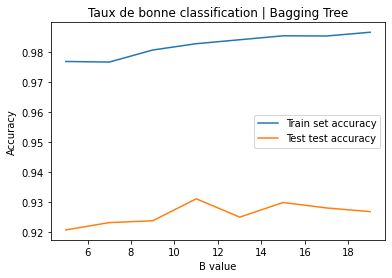

In [62]:
# Affichage de l'evolution d'accuracy selon la valeur d'entropie 

test_acc_bagging = list(test_acc.values())
train_acc_bagging = list(train_acc.values())

B_values = [b for b in np.arange(5, B, 2)]
plt.plot(B_values, train_acc_bagging, label = "Train set accuracy")
plt.plot(B_values, test_acc_bagging, label = "Test test accuracy")
plt.xlabel("B value")
plt.ylabel("Accuracy")
plt.title("Taux de bonne classification | Bagging Tree")
plt.legend()
plt.show()

**Plus la valeur de B augmente, plus l'accuracy de train set augmente, cela est du au surapprentissage, car nous remarquons parallèlement que accuracy de test set diminue.**

# 4. Apprentissage non-supervisé

Dans cette partie, nous allons analyser la base de données avec deux algorithmes :
- L'algorithme de classification hierarchique.
- L'algorithme de K-moyennes.

La caractèristique principale qui differencie l'apprentissage non-supervisé du supervisé est l'absence des labels. Il faut que les algorithmes eux mêmes peuvent être capables d'estimer le nombre de classes présentes dans le jeu de données. Par ailleurs, puisque nous possedons les labels dans notre base de données, nous allons dans certains cas, afficher les `groupes d'aliments` ou bien les `sous-groupes` juste pour avoir une idée plus claire sur les performances du clustering. 

## 4.1. Algorithme de classification hiérarchique

Puisque cet algorithme est très gourmand en temps de calculs,  nous allons se limiter a un jeu de données de **50 exemples**, cela nous permettra d'aller plus vite et nous permettra d'obtenir un **dendrogramme qui est assez lisible.** 

Nous  allons alors générer un jeu de données appelé `clustering_data` qui va contenir les colonnes `mode de livraison, mode d'emballage, mode de préparation, score unique EF` en **encodage ONE HOT**, pour 50 exemples pris aléatoirement de `data_synthese_fiable`. Nous allons utiliser la méthode de **linkage CENTROIDE**.

In [40]:
# DATASET AVEC LES COLONNES D'IMPACTE SUR ENVIRONNEMENT (Normalisé)
# A DECOMMENTER (LES COMMENTAIRES SUIVANTS SONT FAIT AVEC LE DATASET DU PROCHAIN BLOC)

'''
random.seed(42)

mixed_indexes = [i for i in range(len(data_synthese_fiable))]
random.shuffle(mixed_indexes)
mixed_indexes = mixed_indexes[:50]

smaller_dataset = data_synthese_fiable.iloc[mixed_indexes]
clustering_data = clust.normalisation(smaller_dataset.iloc[:,12:].astype(float))

labels_noms = smaller_dataset["Groupe d'aliment"].unique()
print(len(labels_noms))
'''


'\nrandom.seed(42)\n\nmixed_indexes = [i for i in range(len(data_synthese_fiable))]\nrandom.shuffle(mixed_indexes)\nmixed_indexes = mixed_indexes[:50]\n\nsmaller_dataset = data_synthese_fiable.iloc[mixed_indexes]\nclustering_data = clust.normalisation(smaller_dataset.iloc[:,12:].astype(float))\n\nlabels_noms = smaller_dataset["Groupe d\'aliment"].unique()\nprint(len(labels_noms))\n'

In [41]:
random.seed(42)

smaller_dataset = data_synthese_fiable.iloc[0:50]

labels_noms = smaller_dataset["Sous-groupe d'aliment"].unique()
print(len(labels_noms))

smaller_dataset = smaller_dataset.iloc[:,8:13]

smaller_dataset_values = smaller_dataset.values
smaller_dataset_values = np.delete(smaller_dataset_values,3,1)
smaller_dataset_values = cl.one_hot_encoder(smaller_dataset_values)

clustering_data = pd.DataFrame(smaller_dataset_values)




9


In [338]:
data_synthese_fiable.loc[0:50]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
5,13001,13001,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, sec","Apricot, pitted, dried",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.315730,0.041668,0.156978,1.036479,4.955795,248.627750,260.488540,7.717328,184.622520,11.016019
7,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",mix de consommation FR,0,Ambiant (long),LPDE,...,0.701238,0.098439,0.116177,2.240995,11.705482,21.750919,157.987250,4.925442,341.429410,30.229683
8,21508,21508,"viandes, œufs, poissons",viandes cuites,"Agneau, collier, braisé ou bouilli","Lamb, neck, braised or boiled",mix de consommation FR,0,Glacé,PS,...,6.372366,0.945773,4.197721,3.219668,198.623230,5535.059700,481.595690,15.542101,129.238930,22.659410
9,21514,21514,"viandes, œufs, poissons",viandes crues,"Agneau, collier, cru","Lamb, neck, raw",mix de consommation FR,0,Glacé,PS,...,5.041112,0.748324,3.322237,2.516765,157.151610,4381.337200,378.678060,12.203794,92.026149,17.502130
10,21516,21516,"viandes, œufs, poissons",viandes crues,"Agneau, côte filet, crue","Lamb, chop fillet, raw",mix de consommation FR,0,Glacé,PS,...,5.041112,0.748324,3.322237,2.516765,157.151610,4381.337200,378.678060,12.203794,92.026149,17.502130


Distance minimale trouvée entre [ [0] , [2] ] =  0.0
Distance minimale trouvée entre [ [6] , [39] ] =  0.0
Distance minimale trouvée entre [ [7] , [19] ] =  0.0
Distance minimale trouvée entre [ [8] , [9] ] =  0.0
Distance minimale trouvée entre [ [10] , [12] ] =  0.0
Distance minimale trouvée entre [ [11] , [20] ] =  0.0
Distance minimale trouvée entre [ [13] , [15] ] =  0.0
Distance minimale trouvée entre [ [16] , [13, 15] ] =  0.0
Distance minimale trouvée entre [ [17] , [18] ] =  0.0
Distance minimale trouvée entre [ [21] , [24] ] =  0.0
Distance minimale trouvée entre [ [22] , [25] ] =  0.0
Distance minimale trouvée entre [ [23] , [8, 9] ] =  0.0
Distance minimale trouvée entre [ [27] , [29] ] =  0.0
Distance minimale trouvée entre [ [32] , [33] ] =  0.0
Distance minimale trouvée entre [ [34] , [35] ] =  0.0
Distance minimale trouvée entre [ [36] , [37] ] =  0.0
Distance minimale trouvée entre [ [38] , [32, 33] ] =  0.0
Distance minimale trouvée entre [ [41] , [42] ] =  0.0
Distan

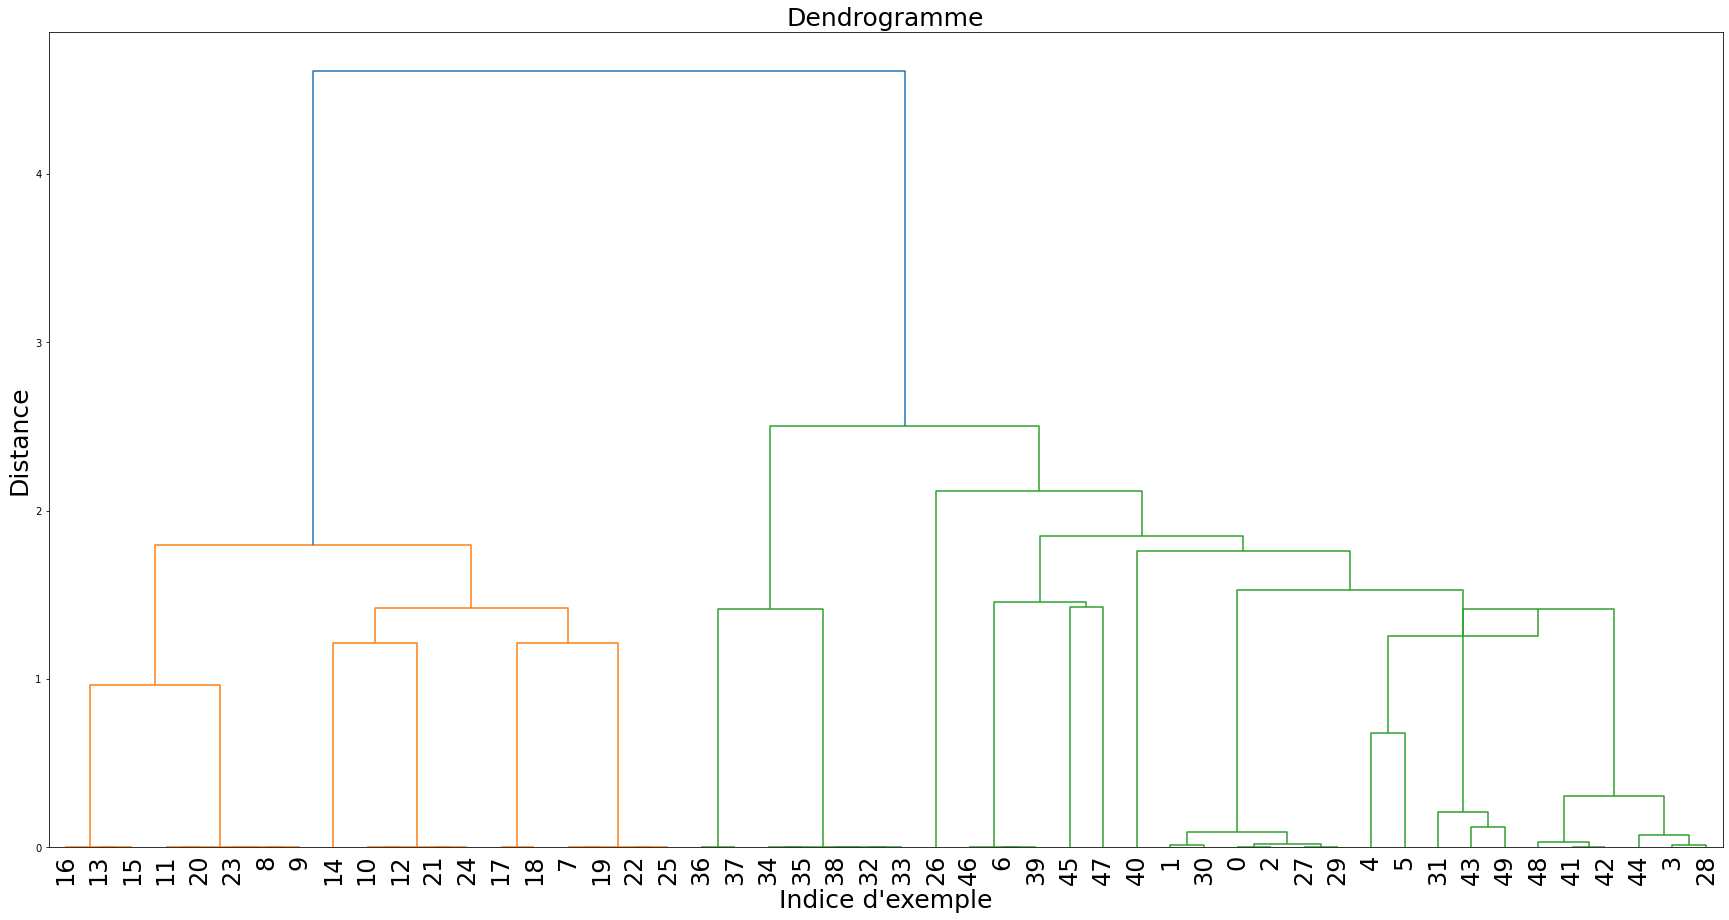

In [43]:
results = clust.clustering_hierarchique(clustering_data,True,True,"centroide")

Dans la pratique, pour estimer le bon nombre de clusters à former, **on regarde le dendrogramme puis on coupe le plus grand saut au milieu, et on compte le nombre d'intersection**.

Par contre, cela ne marche pas toujours, surtout quand les données sont aussi complexes que celles d'`agrybalise`.

<font color="GREEN">**Pour cela, nous avons écrit une fonction `clustering_info` qui prend en paramètre :**
- Le dataframe des données.
- Le réslutat obtenu à partir de la méthode `clustering_hiearchique`.
- Le nombre de clusters qu'on souhaite former.
- l'indice de la colonne qui va servir comme indicateur d'un exemple.</font>

Cette méthode fait appel à `scipy.cluster.hierarchy.fcluster` qui rend une matrice contenant le numero du cluster de chaque exemple.

**Par exemple, dans le bloc ci-dessous, nous allons faire varier le nombre de clusters qu'on souhaite obtenir, pour recuperer après le sous-groupe d'aliment (colonne 3) de chaque element de chaque cluster à partir de `data_synthese_fiable`.**

In [44]:
for nbr_clusters in range(6,21) :
    print("\n***********************************************************\n")
    print("Clusters composition if the number of clusters = ", nbr_clusters)
    clust.clustering_info(data_synthese_fiable, results, nbr_clusters, 3)



***********************************************************

Clusters composition if the number of clusters =  6
- Cluster  1  :  ['viandes crues']  -  [8]
- Cluster  2  :  ['viandes cuites']  -  [11]
- Cluster  3  :  ['charcuteries']  -  [7]
- Cluster  4  :  ['algues' 'fromages' 'légumes']  -  [3 1 1]
- Cluster  5  :  ['boisson alcoolisées' 'fruits' 'légumes']  -  [ 1 11  6]
- Cluster  6  :  ['plats composés']  -  [1]

***********************************************************

Clusters composition if the number of clusters =  7
- Cluster  1  :  ['viandes crues']  -  [8]
- Cluster  2  :  ['viandes cuites']  -  [11]
- Cluster  3  :  ['charcuteries']  -  [7]
- Cluster  4  :  ['algues' 'fromages' 'légumes']  -  [3 1 1]
- Cluster  5  :  ['fruits' 'légumes']  -  [11  6]
- Cluster  6  :  ['boisson alcoolisées']  -  [1]
- Cluster  7  :  ['plats composés']  -  [1]

***********************************************************

Clusters composition if the number of clusters =  8
- Cluster  1  

### Remarques :
Ici, nous avons fait varier le nombre de clusters de 6 à 19. Nous pouvons déja remarquer quelles sont les valeurs prises par `nbr_clusters` qui ne sont pas correctes.

<font color="RED">**Un indicateur que `nbr_clusters` a une valeur trop petite est le fait de trouver des clusters plus gros que les autres, et qui contiennent des exemples qu'on souhaite séparer (des exemples qui ne sont pas vraiment similaires).**
</font>
             
- Prenons l'exemple de `nbr_clusters = 6` : Regardons le **Cluster 5**, on souhaite etre capable de differncier entre **les boissons alcoolisées et les fruits** quand même!

<font color="RED">**Un indicateur que `nbr_clusters` a une valeur trop grande est le fait de trouver des clusters vides ou plusieurs clusters contenant le meme type de produit alimentaire.**
</font>

- Prenons l'exemple de `nbr_clusters = 20` : Regardons les **Clusters 3,4,5,6**, on se demande quelle est la différence entre ces viandes cuites, mais en réalité, la différence est négligeable et peu importante!

<font color="GREEN">**En prenant `nbr_clusters = 10`, on remarque que la séparation entre les différents produits alimentaires n'est pas mal! Les viandes crues sont dans le cluster 1, les viandes cuits dans les cluster 2... etc, à l'exception de certain produits alimentaires qui sont très proches en terme de Score Unique EF malgré leur difference du groupe alimentaire, tel que le cluster 8 (fruits et légumes).**</font>




In [346]:
# Autres méthode de linkage
results2 = clust.clustering_hierarchique(clustering_data,False,False,"simple")
results3 = clust.clustering_hierarchique(clustering_data,False,False,"complete")
results4 = clust.clustering_hierarchique(clustering_data,False,False,"average")

In [351]:
for nbr_clusters in range(6,20) :
    print("\n***********************************************************\n")
    print("Clusters composition if the number of clusters = ", nbr_clusters)
    print("LINKAGE METHOD: SIMPLE")
    clust.clustering_info(data_synthese_fiable, results2, nbr_clusters, 3)
    print("***********************************************************")
    print("LINKAGE METHOD: COMPLETE")
    clust.clustering_info(data_synthese_fiable, results3, nbr_clusters, 3)
    print("***********************************************************")
    print("LINKAGE METHOD: AVERAGE")
    clust.clustering_info(data_synthese_fiable, results4, nbr_clusters, 3)
    print("***********************************************************")
    print("***********************************************************")


***********************************************************

Clusters composition if the number of clusters =  6
LINKAGE METHOD: SIMPLE
- Cluster  1  :  ['charcuteries']  -  [7]
- Cluster  2  :  ['viandes crues' 'viandes cuites']  -  [ 8 11]
- Cluster  3  :  ['algues']  -  [3]
- Cluster  4  :  ['fromages' 'fruits' 'légumes']  -  [ 1 11  7]
- Cluster  5  :  ['boisson alcoolisées']  -  [1]
- Cluster  6  :  ['plats composés']  -  [1]
***********************************************************
LINKAGE METHOD: COMPLETE
- Cluster  1  :  ['viandes crues']  -  [8]
- Cluster  2  :  ['viandes cuites']  -  [11]
- Cluster  3  :  ['charcuteries']  -  [7]
- Cluster  4  :  ['algues' 'fromages' 'fruits' 'légumes']  -  [3 1 2 1]
- Cluster  5  :  ['boisson alcoolisées' 'fruits' 'légumes']  -  [1 9 6]
- Cluster  6  :  ['plats composés']  -  [1]
***********************************************************
LINKAGE METHOD: AVERAGE
- Cluster  1  :  ['viandes crues']  -  [8]
- Cluster  2  :  ['viandes cuites'

## 4.2. Algorithme de K-moyennes

L'algorithme K-means a un hyper-paramètre K, qui est le nombre de clusters que nous souhaitrons avoir à la fin d'execution de l'algorithme. Si nous connaissons pas le nombre de classes (clusters) au préalable, **comment peut on fixer la valeur de K?**

C'est ici où intervient deux mesures de la qualité du clustering :
- `Indice de Dunn` :  Sepmin / Codistance
- `Indice de Xie-Beni` : Sepmin(Distance minimale de separation entre clusters dans la partition) / Coinertie

Le but est de trouver un K tel que ce K **maximise** `l'indice de Dunn` et/ou **minimise** `l'indice de Xie-Beni`.

Il est parfois difficile de trouver la bonne valeur de K, meme si cette derniere maximise `l'indice de Dunn` et minimise celui de `Xie-Beni`, cela ne veut pas dire qu'elle est forcément la bonne valeur. Pour fixer ce paramètre, on nécessite parfois l'aide d'autres spécialistes dans le domaine traité par la base de données, par exemple des agriculteurs dans cet exemple, car ils seront capable d'estimer au préalable combien de classes nous avons. On peut aussi évaluer la qualité de notre Partition à l'aide d'autres méthodes tel que : **La compacité des clusters**, ou bien **La séparabilitié des clusters.**


**Avant de commencer**, nous allons reconstruire le jeu de données. Il n'est plus nécessaire de réduire le nombre d'exemples à prendre, car la fonction `kmoyennes` est **assez rapide**. Nous allons par contre utiliser l'encodage **ONE HOT** une autre fois, en prenant comme colonnes : `Livraison, Mode d'emballage, Mode de préparation`

Nous allons maintenant appeler la fonction kmoyennes que nous avons programmée en TME, en faisant varier la valeur de K et en calculant en meme temps les valeurs des indices.



In [20]:
random.seed(42)

mixed_indexes = [i for i in range(len(data_synthese_fiable))]

smaller_dataset = data_synthese_fiable.iloc[mixed_indexes]
smaller_dataset = smaller_dataset.iloc[:,8:13]


smaller_dataset_values = smaller_dataset.values
smaller_dataset_values = np.delete(smaller_dataset_values,3,1)
smaller_dataset_values = cl.one_hot_encoder(smaller_dataset_values)


clustering_data = pd.DataFrame(smaller_dataset_values)

labels_noms = data_synthese_fiable["Sous-groupe d'aliment"].unique()
print(len(labels_noms))


50


In [21]:
np.random.seed(42)
random.seed(42)


dunn_indexes = []
xb_indexes = []
k_values = []

for k in range(5,52,2) :
    les_centres, l_affectation = clust.kmoyennes(k, clustering_data, 0.05, 100)

    # Affichage des groupe de produits de chaque element de chaque Cluster, sert à voir comment se sont groupés les produits
    '''
    #print("Affichage des centres: ",les_centres)
    #print("Affichage des affectations: ",l_affectation)
    
    print("************************************** K = ", k)

    for i in range(len(les_centres)) :
        tmp = []
        for j in l_affectation[i] :
            tmp.append(data_synthese_fiable.iloc[j,2])
        tmp = np.array(tmp)
        valeurs, nb_fois = np.unique(tmp,return_counts=True)
        print(valeurs,nb_fois)
        print("**************************************************************")
    '''    

    valeur = clust.index_Dunn(clustering_data, les_centres, l_affectation)
    valeur2 = clust.index_xie_beni(clustering_data, les_centres, l_affectation)

    print("Valeur de K = ", k,  "\t- DUNN : ", valeur, "\t- XIE BENI : ", valeur2)

    k_values.append(k)
    dunn_indexes.append(valeur)
    xb_indexes.append(valeur2)

print("\nNombre de clusters optimal selon l'indice de Dunn : ", k_values[dunn_indexes.index(max(dunn_indexes))])
print("\nNombre de clusters optimal selon l'indice de Xie-Beni : ", k_values[xb_indexes.index(min(xb_indexes))])

    

Valeur de K =  5 	- DUNN :  0.25849977211653696 	- XIE BENI :  2274.6200237214957
Valeur de K =  7 	- DUNN :  0.25196008993097285 	- XIE BENI :  2133.306477334811
Valeur de K =  9 	- DUNN :  0.3529306160647986 	- XIE BENI :  1517.4613487392728
Valeur de K =  11 	- DUNN :  0.260313695414459 	- XIE BENI :  1622.8021835995255
Valeur de K =  13 	- DUNN :  0.33204770266308775 	- XIE BENI :  1545.2735779268726
Valeur de K =  15 	- DUNN :  0.24257355157510196 	- XIE BENI :  2095.4152076097844
Valeur de K =  17 	- DUNN :  0.26606584817229556 	- XIE BENI :  1472.3513173533233
Valeur de K =  19 	- DUNN :  0.3718461817736785 	- XIE BENI :  1346.024256958647
Valeur de K =  21 	- DUNN :  0.3136018871190485 	- XIE BENI :  1457.5169785040403
Valeur de K =  23 	- DUNN :  0.33206543712762115 	- XIE BENI :  1323.254556805279
Valeur de K =  25 	- DUNN :  0.15472858673280396 	- XIE BENI :  2576.5592361875383
Valeur de K =  27 	- DUNN :  0.3957225729310501 	- XIE BENI :  951.6971654800464
Valeur de K =  29

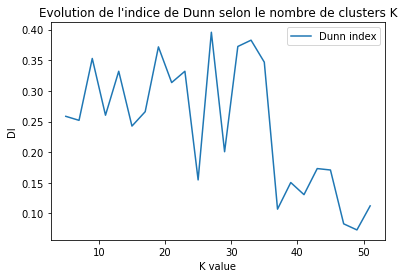

In [22]:
# test accuracy plot lines
plt.plot(k_values, dunn_indexes, label = "Dunn index")
plt.xlabel("K value")
plt.ylabel("DI")
plt.title("Evolution de l'indice de Dunn selon le nombre de clusters K")
plt.legend()
plt.show()

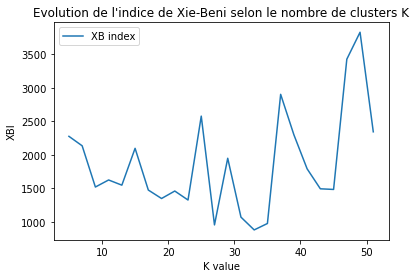

In [23]:
plt.plot(k_values, xb_indexes, label = "XB index")
plt.xlabel("K value")
plt.ylabel("XBI")
plt.title("Evolution de l'indice de Xie-Beni selon le nombre de clusters K")
plt.legend()
plt.show()

### Remarques :
A ce moment, il y a deux valeurs de K intéressantes : `K = 27` et `K = 33`.

#### Laquelle choisir?

Grace au calcul d'`indice de Dunn` et celui de `Xie-Beni`, nous pouvons déja eviter de perdre du temps a analyser certaines valeurs de K qui ont un indice de Dunn assez faible (et réciproquement, un indice XB assez élevé). 


**On peut etudier la dispersion et les points de similarité entres les différents produits alimentaires pour `K = 27` et `K = 33`, ou bien des valeurs de K entre les deux!**


Il faut noter que les classes (du point de vue de Kmeans) ne sont pas les memes que depuis notre point de vue. Pour le jeu de données `clustering_data` que nous avons pris, il nous semble intuitif de classifier les elements par groupe d'aliments, par exemple. Mais ceci devient un peu plus compliqué quand certains aliments venant de groupes alimentaires différents, sont très similaires lorsqu'il s'agit de l'impacte sur l'environnement, le mode d'emballage, le mode de livraison ou le mode de préparation. **C'est pour cela que le nombre de Clusters n'est pas forcément égale au nombre de groupe/sous-groupes alimentaires**.


<font color="GREEN">Dans la pratique, nous n'avons pas les labels des exemples dans un problème non-supervisé, mais dans le cadre de ce projet, nous pouvons exploiter cela à partir de la colonne `groupe d'aliments` pour avoir une idée sur la distribution des produits alimentaires dans les clusters. Vérifions maintenant les classes des exemples qui se trouvent dans chaque cluster. Nous allons fixer la valeur de **K à 27.**</font>

In [26]:
random.seed(42)
np.random.seed(42)

plats = []
viandes_cluster4 = []
viandes_cluster5 = []

les_centres, l_affectation = clust.kmoyennes(27, clustering_data, 0.05, 100)

# Affichage des groupe de produits de chaque element de chaque Cluster, serve a voir comment se sont groupé les produits

#print("Affichage des centres: ",les_centres)
#print("Affichage des affectations: ",l_affectation)

print("********************************************************************")
print("Labels of cluster elements (Label name, number of elements of Label)")
print("********************************************************************\n")


for i in range(len(les_centres)) :
    tmp = []
    for j in l_affectation[i] :
        tmp.append(data_synthese_fiable.iloc[j,2])
        
        if i == 21 and (data_synthese_fiable.iloc[j,2] == "entrées et plats composés"):
            plats.append(data_synthese_fiable.iloc[j,5])
            
        if data_synthese_fiable.iloc[j,2] == "viandes, œufs, poissons":
            if i == 21 :
                viandes_cluster4.append(data_synthese_fiable.iloc[j,5])
             
            elif i == 23 :
                viandes_cluster5.append(data_synthese_fiable.iloc[j,5])


            
    tmp = np.array(tmp)
    valeurs, nb_fois = np.unique(tmp,return_counts=True)

    print("Cluster ", i, " : ", nb_fois)
    
    for i in range(len(valeurs)) :
        print("\t",valeurs[i], " : ", nb_fois[i])
    
    print("---------------------------------------------------------------")

********************************************************************
Labels of cluster elements (Label name, number of elements of Label)
********************************************************************

Cluster  0  :  [ 1  3 30]
	 entrées et plats composés  :  1
	 lait et produits laitiers  :  3
	 viandes, œufs, poissons  :  30
---------------------------------------------------------------
Cluster  1  :  [  3  59 129  12   9   4]
	 aides culinaires et ingrédients divers  :  3
	 boissons  :  59
	 fruits, légumes, légumineuses et oléagineux  :  129
	 lait et produits laitiers  :  12
	 produits céréaliers  :  9
	 produits sucrés  :  4
---------------------------------------------------------------
Cluster  2  :  [77  3]
	 entrées et plats composés  :  77
	 fruits, légumes, légumineuses et oléagineux  :  3
---------------------------------------------------------------
Cluster  3  :  [ 1  8 12  3 20 17]
	 aides culinaires et ingrédients divers  :  1
	 boissons  :  8
	 fruits, légumes

### Commentaires :
Certains groupe d'aliments ressemblent d'autres groupes quand il s'agit des attributs que nous avons utilisé dans `clustering_data`. Nous pouvons remarquer cela lorsqu'il existe deux groupes d'aliments différents dans le meme cluster avec des **fréquences assez elevées et assez proches**, par exemple : 

- La présence de **57 viandes, œufs, poissons** et de **14 entrées et plats composés** dans le cluster 21. <font color="RED">**ceci revient au fait que ces plats sont composés de la viande, du poisson ou des oeufs.**</font>

Nous avons ajouté dans le code au-dessous quelques lignes qui vont nous permettre de recuperer les noms des plats qui se trouvent dans le **cluster 21**.



In [34]:
# plats is filled up in the upper block of code
for plat in plats :
    print(plat)

Celeriac in remoulade sauce, prepacked
Greek-style marinated mushrooms
Toasted ham sandwich topped with grated cheese and a fried egg
Toasted ham sandwich topped with grated cheese
Grilled cheese & ham sandwich, prepacked
Caesar's salad (salad, chicken, croûtons, sauce)
Coleslaw, w sauce, prepacked
Prepared pasta salad, with vegetable, meat or fish
Prepared pasta salad, vegetarian
Potato salad, piémontaise-style, prepacked
Prepared potatoes salad, home-made
Prepared rice salad
Tabbouleh with chicken, prepacked
Tabbouleh, prepacked


<font color=GREEN>**Comme vous voyez, ces plats contiennent plusieurs types de viandes/oeufs : ham, chicken,fried egg, fish... etc. Ce qui justifie le regroupement dans un même cluster.`**</font>

Des fois, des aliments du meme groupe sont vachement différents lorsqu'il s'agit des attributs que nous avons utilisé dans `clustering_data`. Nous pouvons remarquer cela lorsque le même groupe d'aliments s'éparpie dans des clusters différents. Par exemple : 

- **57 viandes, œufs, poissons dans le cluster 21** et **44 viandes, œufs, poissons dans le cluster 23**.



In [35]:
# viand_cluster4 corresponds to cluster 21, viands_cluster5 corresponds to cluster23

for food in viandes_cluster4 :
    print(food)

print("\n*******************************************************************************\n")

for food in viandes_cluster5 :
    print(food)

Pork on skewer, raw
Brain, pork, raw
Brain, calf, raw
Sausage meat, raw
Heart, pork, raw
Heart, chicken, raw
Heart, veal, raw
Preserved pork liver
Scallop, with coral, raw
Bacon, back
Liver, pork, raw
Liver, chicken, raw
Liver, calf, raw
Gizzard, chicken, raw
Chicken cooked ham, in slices
Tongue, pork, raw
Tongue, calf, raw
Smoked lardoons, raw
Lardoons, raw
Mussel, common, raw
Mediterranean mussel, raw
Duck mousse
Pork liver mousse
Pork liver mousse, superior quality
Pork, back fat, rindless, raw
Pork, rind, raw
Pork, jowl, rindless, raw
Pork, belly, flank removed, raw
Chicken, stewing, leg, raw
Hen, meat only, raw
Hen, meat and skin, raw
Chicken, white race, meat and skin, raw
Chicken, eviscerated without offal, raw
Chicken, free-range, meat and skin, raw
Chicken, wing, meat and skin, raw
Chicken, leg, meat and skin, raw
Chicken, leg, meat, raw
Chicken, breast, without skin, raw
Chicken high leg, meat, raw
Chicken, drumstick, raw
Chicken, breast, meat and skin, raw
Chicken, meat and 

La différence est assez claire: 
- dans le **cluster 21**, la majorité des viandes sont : **crues (raw)**.
- dans le **cluster 23**, la majorité des viandes sont **préparées déja (cooked, roasted, boiled, pan-fried)**

<font color=GREEN>**D'où vient la dispersion d'un meme groupe d'aliments sur plusieurs clusters.**</font>
<div class="alert alert-block alert-success"><b>CONCLUSION :</b>
Comme nous l'avons déja dit, la classification par Kmeans ne génère pas forcément le meme nombre de clusters que des groupes / sous-groupes d'aliments, ceci revient à : 

- La similarité entre certains aliments parvenant de groupes alimentaires différents, cela peut etre soit :
    
   
    - A cause des ingrédients.
    - A cause du mode de transport, mode d'emballage... etc, ce qui diminue la différences entre ces aliments quand on  parle d'impacte sur l'environnement.

    
- Certains aliments parvenant du meme groupe alimentaire, se trouvent dans des clusters complétement différents, cela revient au fait que :
    
    
    - Il existe plusieurs sous-groupes alimentaires assez différents au sein du meme groupe alimentaire, tel qu'est l'exemple pour la viande : la viande crue n'est pas cuite!
</div>

# 5. Experimentions sur Data Etape

In [30]:
data_etape_fiable = data_etape.loc[data_etape['DQR']<=3]
print(data_etape_fiable.shape)

column_names = data_synthese.columns[12:]
etape_names = ["Agriculture", "Transformation", "Emballage", "Transport", "Supermarché et distribution", "Consommation"]

(1684, 102)


## 5.1. Supervisé

Dans le fichier `data_étape.csv`, on observe que chaque indicateur environnemental est représenté pour chaque étape de production. 

On va premièrement essayer de classifier les produits en se basant sur :
- L'étape de production (les différents facteurs d'impacte sur l'environnement de chaque étape de production)
    - nous allons repérer le facteur d'impacte le plus pertinent de chaque étape de production.
    
    
- Le facteur d'impacte sur l'environnement (les différentes étapes de chaque facteur d'impacte sur l'environnement)

### 5.1.1. Classification par étape de production

In [443]:
np.random.seed(42)
random.seed(42)

# Les noms des differents labels
labels_noms = data_etape_fiable["Groupe d'aliment"].unique()
lines, columns = data_etape_fiable.shape

# Les colonnes qui vont servir comme caractèristiques des 'x' seront les colonnes qui décrivent l'impacte sur l'environement


Y = np.array(data_etape_fiable.iloc[:,2])

# Création du training set et du test set avec la crossvalidation
niter = 5

# Recupération des noms des attributs les plus discriminants à chaque étape

acc_num = [] # list of Average training set accuracy per entropy value
tacc_num = [] # list of Average test set accuracy per entropy value
deb = 8
for i in range(6):
    X = np.array(data_etape_fiable.iloc[:,[deb,deb+6,deb+12,deb+18,deb+24,deb+30,deb+36,deb+42,deb+48,deb+54,deb+60,deb+66,deb+72,deb+78,deb+84]])
    columns_noms = data_etape_fiable.columns[[deb,deb+6,deb+12,deb+18,deb+24,deb+30,deb+36,deb+42,deb+48,deb+54,deb+60,deb+66,deb+72,deb+78,deb+84]]
    
    index = np.random.permutation(len(X)) # mélange des index
    Xm = X[index]
    Ym = Y[index]
    
    att_disc = []
    train_acc = []
    test_acc =  []  
    
    for j in range(niter) :
        desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm, Ym, niter, j)
        arbre_synthese = cl.ClassifierArbreNumerique(len(columns_noms), 0.1, columns_noms)
        arbre_synthese.train(desc_set,label_set, att_disc)
        train_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(desc_set,label_set))))
        test_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(tdesc_set,tlabel_set))))

    print("\n*********************************************************************")
    print("Etape =  ", etape_names[i], " :")
    
    #print("Accuracies of training set : ", train_acc)
    #print("Accuracies of test set : ", test_acc)
    
    print("Average accuracy of training set : ", sum(train_acc)/len(train_acc))
    print("Average accuracy of test set : ", sum(test_acc)/len(test_acc))
    
    acc_num.append(sum(train_acc)/len(train_acc))
    tacc_num.append(sum(test_acc)/len(test_acc))
    
    
    print("\n The fifteen most used attributs for the tree splitting (in order): ")
    print("\tFormat (Attribute name, Number of times used to split the tree)")
    
    counter=collections.Counter(att_disc)
    k = 1
    for elt in counter.most_common(15):
        print("\t",k ," - ", elt)
        k+=1


    print("\n*********************************************************************")
    deb = deb+1



*********************************************************************
Etape =   Agriculture  :
Average accuracy of training set :  0.9883000000000001
Average accuracy of test set :  0.83424

 The fifteen most used attributs for the tree splitting (in order): 
	Format (Attribute name, Number of times used to split the tree)
	 1  -  ('Score unique EF (mPt / kg de produit) - Agriculture', 332)
	 2  -  ('Rayonnements ionisants (kBq U-235 eq/kg de produit) - Agriculture', 110)
	 3  -  ('Changement climatique (kg CO2 eq/kg de produit) - Agriculture', 91)
	 4  -  ("Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Agriculture", 65)
	 5  -  ('Épuisement des ressources eau (m3 depriv./kg de produit) - Agriculture', 57)
	 6  -  ('Utilisation du sol (Pt/kg de produit) - Agriculture', 54)
	 7  -  ('Particules (E-06 disease inc./kg de produit) - Agriculture', 53)
	 8  -  ("Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit) - Agriculture", 48)
	 9  -  ('E

In [442]:
dic0 = dict.fromkeys(etape_names)
for i in range(len(etape_names)) :
    dic0[etape_names[i]] = tacc_num[i]

sorted_tuples = sorted(dic0.items(), key=lambda item: item[1],reverse=True)

i = 1
for tup in sorted_tuples :
    print(i, " - ", tup[0], " | test accuracy = ", tup[1])
    i+=1

1  -  Emballage  | test accuracy =  0.8763
2  -  Supermarché et distribution  | test accuracy =  0.86188
3  -  Agriculture  | test accuracy =  0.83424
4  -  Transport  | test accuracy =  0.8215999999999999
5  -  Transformation  | test accuracy =  0.788
6  -  Consommation  | test accuracy =  0.65044


**REMARQUES :**

**La liste obtenu ci-dessus donne les étapes qui donnent les meilleurs résultats de classification (dans l'ordre).**

<font color="GREEN">**En consultant la liste des 15 attributs les plus utilisés dans la construction de l'arbre à chaque étape, nous trouvons que :**</font>
- **Score unique EF (mPt / kg de produit)** est utilisé le plus dans l'étape **Transport**, avec une fréquence de **488**.
- **Rayonnements ionisants (kBq U-235 eq/kg de produit)** est utilisé le plus dans l'étape **Agriculture**, avec une fréquence de **110**.
- **Changement climatique (kg CO2 eq/kg de produit)** est utilisé le plus dans l'étape **Agriculture**, avec une fréquence de **91**.
- **Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)** est utilisé le plus dans l'étape **Transport**, avec une fréquence de **74**.
- **Épuisement des ressources eau (m3 depriv./kg de produit)** est utilisé le plus dans l'étape **Transformation**, avec une fréquence de **77**.
- **Utilisation du sol (Pt/kg de produit)** est utilisé le plus dans l'étape **Transport**, avec une fréquence de **68**.
- **Particules (E-06 disease inc./kg de produit)** est utilisé le plus dans l'étape **Transport**, avec une fréquence de **65**.
- **Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)** est utilisé le plus dans l'étape **Agriculture**, avec une fréquence de **48**.
- **Eutrophisation marine (E-03 kg N eq/kg de produit)** est utilisé le plus dans l'étape **Agriculture**, avec une fréquence de **42**.
- **Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)** est utilisé le plus dans l'étape **Transport**, avec une fréquence de **94**.
- **Eutrophisation eaux douces (E-03 kg P eq/kg de produit)** est utilisé le plus dans l'étape **Transport**, avec une fréquence de **59**.
- **Eutrophisation terreste (mol N eq/kg de produit)** est utilisé le plus dans l'étape **Transport**, avec une fréquence de **66**.
- **Épuisement des ressources énergétiques (MJ/kg de produit)** est utilisé le plus dans l'étape **Agriculture**, avec une fréquence de **20**.
- **Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)** est utilisé le plus dans l'étape **Transport**, avec une fréquence de **116**.
- **Acidification terrestre et eaux douces (mol H+ eq/kg de produit)** est utilisé le plus dans l'étape **Transport**, avec une fréquence de **58**.

**Ceci a du sense! Par exemple :** 
- Les rayonnement ionisants sont plus pertinents pendant pendant la période d'agriculutre à cause de l'irradiation pour prolonger la vie des différents aliments. 


- L'appauvrissement de la couche d'ozone est plus pertinent pendant l'étape de transport à cause de l'emission du CO par les véhicules de transport...


**Essayons maintenant de combiner ces attributs (une étape par attribut) et de créer un nouveau data set!**

In [484]:
np.random.seed(42)
random.seed(42)

#i = 8
#for col in data_etape_fiable.columns[8:]:
#    print(i, "- ", col)
#    i+=1

attrs = [11,14,23,26,81,71,41,74,62,95,53,86,35,47,59]
X_new = np.array(data_etape_fiable.iloc[:,attrs])
columns_noms_new = data_etape_fiable.columns[attrs]

# Les noms des differents labels
labels_noms = data_etape_fiable["Groupe d'aliment"].unique()
lines, columns = data_etape_fiable.shape

# Les colonnes qui vont servir comme caractèristiques des 'x' seront les colonnes qui décrivent l'impacte sur l'environement
                 
Y = np.array(data_etape_fiable.iloc[:,2])

# Création du training set et du test set avec la crossvalidation
niter = 5                 
                 
index = np.random.permutation(len(X_new)) # mélange des index
Xm = X_new[index]
Ym = Y[index]

att_disc_new = []
train_acc_new = []
test_acc_new =  []  

for j in range(niter) :
    desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm, Ym, niter, j)
    arbre_synthese = cl.ClassifierArbreNumerique(len(columns_noms_new), 0.1, columns_noms_new)
    arbre_synthese.train(desc_set,label_set, att_disc_new)
    train_acc_new.append(float("{0:.4f}".format(arbre_synthese.accuracy(desc_set,label_set))))
    test_acc_new.append(float("{0:.4f}".format(arbre_synthese.accuracy(tdesc_set,tlabel_set))))

print("Accuracies of training set : ", train_acc_new)
print("Accuracies of test set : ", test_acc_new)

print("Average accuracy of training set : ", sum(train_acc_new)/len(train_acc_new))
print("Average accuracy of test set : ", sum(test_acc_new)/len(test_acc_new))

print("\n The fifteen used attributs for the tree splitting (in order): ")
print("\tFormat (Attribute name, Number of times used to split the tree)")

counter=collections.Counter(att_disc_new)
k = 1
for elt in counter.most_common(15):
    print("\t",k ," - ", elt)
    k+=1


Accuracies of training set :  [0.9926, 0.9933, 0.9919, 0.9919, 0.9904]
Accuracies of test set :  [0.8769, 0.8679, 0.8679, 0.8048, 0.9069]
Average accuracy of training set :  0.9920200000000001
Average accuracy of test set :  0.8648800000000001

 The fifteen used attributs for the tree splitting (in order): 
	Format (Attribute name, Number of times used to split the tree)
	 1  -  ('Score unique EF (mPt / kg de produit) - Transport', 289)
	 2  -  ('Changement climatique (kg CO2 eq/kg de produit) - Agriculture', 130)
	 3  -  ('Épuisement des ressources eau (m3 depriv./kg de produit) - Transformation', 104)
	 4  -  ('Rayonnements ionisants (kBq U-235 eq/kg de produit) - Agriculture', 58)
	 5  -  ('Eutrophisation marine (E-03 kg N eq/kg de produit) - Agriculture', 42)
	 6  -  ("Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) - Transport", 38)
	 7  -  ("Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit) - Agriculture", 35)
	 8  -  ('Utilisation du 

**Conclusion:**

**Il ne suffit pas d'extraire seulement un seul attribut par etape. Les résultats ne sont pas vraiment à la hauteur (taux de bonne classification = 0.86).  Dans ce genre de scenario, une aide de la part d'un expert du domaine permet d'extraire les colonnes qui maximisent l'accuracy, car un expert peut dicter quelles sont les colonnes de chaque étape qui sont pertinentes**.

<font color="GREEN">**Nous allons remarquer par la suite, que lorsqu'on combine le meme facteur d'impacte sur plusieurs étapes  dans notre jeu de données, nous pouvons obtenir des résultats plus intéréssants.**</font>

### 5.1.2. Classification par facteur d'impacte sur l'environement

In [446]:
np.random.seed(42)
random.seed(42)

# Les noms des differents labels
labels_noms = data_etape_fiable["Groupe d'aliment"].unique()
lines, columns = data_etape_fiable.shape

# Les colonnes qui vont servir comme caractèristiques des 'x' seront les colonnes qui décrivent l'impacte sur l'environement


Y = np.array(data_etape_fiable.iloc[:,2])

# Création du training set et du test set avec la crossvalidation
niter = 10

# Recupération des noms des attributs les plus discriminants à chaque étape

acc_num = [] # list of Average training set accuracy per selected columns
tacc_num = [] # list of Average test set accuracy per selected columns

deb = 8
for i in range(15):
    X = np.array(data_etape_fiable.iloc[:,deb:deb+6])
    columns_noms = data_etape_fiable.columns[deb:deb+6]
    
    index = np.random.permutation(len(X)) # mélange des index
    Xm = X[index]
    Ym = Y[index]
    
    att_disc = []
    train_acc = []
    test_acc =  []  
    
    for j in range(niter) :
        desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm, Ym, niter, j)
        arbre_synthese = cl.ClassifierArbreNumerique(len(columns_noms), 0.1, columns_noms)
        arbre_synthese.train(desc_set,label_set, att_disc)
        train_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(desc_set,label_set))))
        test_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(tdesc_set,tlabel_set))))

    print("\n*********************************************************************")
    print("Attribut =  ", column_names[i], " :")
    
    #print("Accuracies of training set : ", train_acc)
    #print("Accuracies of test set : ", test_acc)
    
    print("Average accuracy of training set : ", sum(train_acc)/len(train_acc))
    print("Average accuracy of test set : ", sum(test_acc)/len(test_acc))
    
    acc_num.append(sum(train_acc)/len(train_acc))
    tacc_num.append(sum(test_acc)/len(test_acc))
    
    
    print("\n The six most used attributs for the tree splitting (in order): ")
    print("\tFormat (Attribute name, Number of times used to split the tree)")
    
    counter=collections.Counter(att_disc)
    k = 1
    for elt in counter.most_common(6):
        print("\t",k ," - ", elt)
        k+=1


    print("\n*********************************************************************")
    deb = deb+6


*********************************************************************
Attribut =   Score unique EF (mPt/kg de produit)  :
Average accuracy of training set :  0.9946800000000001
Average accuracy of test set :  0.91644

 The six most used attributs for the tree splitting (in order): 
	Format (Attribute name, Number of times used to split the tree)
	 1  -  ('Score unique EF (mPt / kg de produit) - Agriculture', 413)
	 2  -  ('Score unique EF (mPt / kg de produit) - Emballage', 276)
	 3  -  ('Score unique EF (mPt / kg de produit) - Transformation', 195)
	 4  -  ('Score unique EF (mPt / kg de produit) - Transport', 150)
	 5  -  ('Score unique EF (mPt / kg de produit) - Supermarché et distribution', 138)
	 6  -  ('Score unique EF (mPt / kg de produit) - Consommation', 84)

*********************************************************************

*********************************************************************
Attribut =   Changement climatique (kg CO2 eq/kg de produit)  :
Average accuracy

In [447]:
dic = dict.fromkeys(column_names)
for i in range(len(column_names)) :
    dic[column_names[i]] = tacc_num[i]

sorted_tuples = sorted(dic.items(), key=lambda item: item[1],reverse=True)

i = 1
for tup in sorted_tuples :
    print(i, " - ", tup[0], " | test accuracy = ", tup[1])
    i+=1

1  -  Particules (E-06 disease inc./kg de produit)  | test accuracy =  0.94266
2  -  Acidification terrestre et eaux douces (mol H+ eq/kg de produit)  | test accuracy =  0.9359500000000001
3  -  Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)  | test accuracy =  0.9322900000000001
4  -  Changement climatique (kg CO2 eq/kg de produit)  | test accuracy =  0.9298500000000001
5  -  Eutrophisation eaux douces (E-03 kg P eq/kg de produit)  | test accuracy =  0.9274100000000001
6  -  Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)  | test accuracy =  0.9261900000000001
7  -  Épuisement des ressources énergétiques (MJ/kg de produit)  | test accuracy =  0.9261899999999998
8  -  Rayonnements ionisants (kBq U-235 eq/kg de produit)  | test accuracy =  0.9249700000000001
9  -  Épuisement des ressources eau (m3 depriv./kg de produit)  | test accuracy =  0.9249700000000001
10  -  Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)  | test accuracy =

**La liste obtenu ci-dessus donne les attributs environmenteaux qui donnent les meilleurs résultats de classification (dans l'ordre).**

L'attribut **Particules (E-06 disease inc./kg de produit)** donne les meilleurs résultats de classifications car il présente des valeurs assez diversifiées entres les différentes étapes et entre les différents produits alimentaires, ce qui facilite la vie pour le classifieur. Le deuxième attribut est **Acidification terrestre et eaux douces (mol H+ eq/kg de produit)** et ainsi de suite...

### 5.1.3. Conclusion
<font color=GREEN>
<b>Après analyse, nous avons pu voir que la classification par facteur d'impacte donne de meilleurs résultats que la classification par étape.</b>
</div>

## 5.2. Non-supervisé

Dans cette partie, nous allons se limiter au jeu de données qui contient un unique attribut sur plusieurs étapes (2ème jeu de données de la partie supervisée), puisque dans la partie supervisée, les resultats de classifications étaient considérablement plus supérieurs aux resultats de classification par étape unique. 

### 5.2.1. Classification hiéarchique

Puisque cet algorithme est très gourmand en temps de calculs,  nous allons se limiter a un jeu de données de **50 exemples**, cela nous permettra d'aller plus vite et nous permettra d'obtenir des **dendrogrammes qui sont assez lisibles.** 

Nous  allons alors générer un jeu de données appelé `clustering_data` qui va contenir les différentes colonnes qui décrivent un certain attribut sur chaque étape. Pour 50 exemples pris aléatoirement de `data_synthese_fiable`. Nous allons utiliser la méthode de **linkage CENTROIDE**.



Attribut =   Score unique EF (mPt/kg de produit)  :


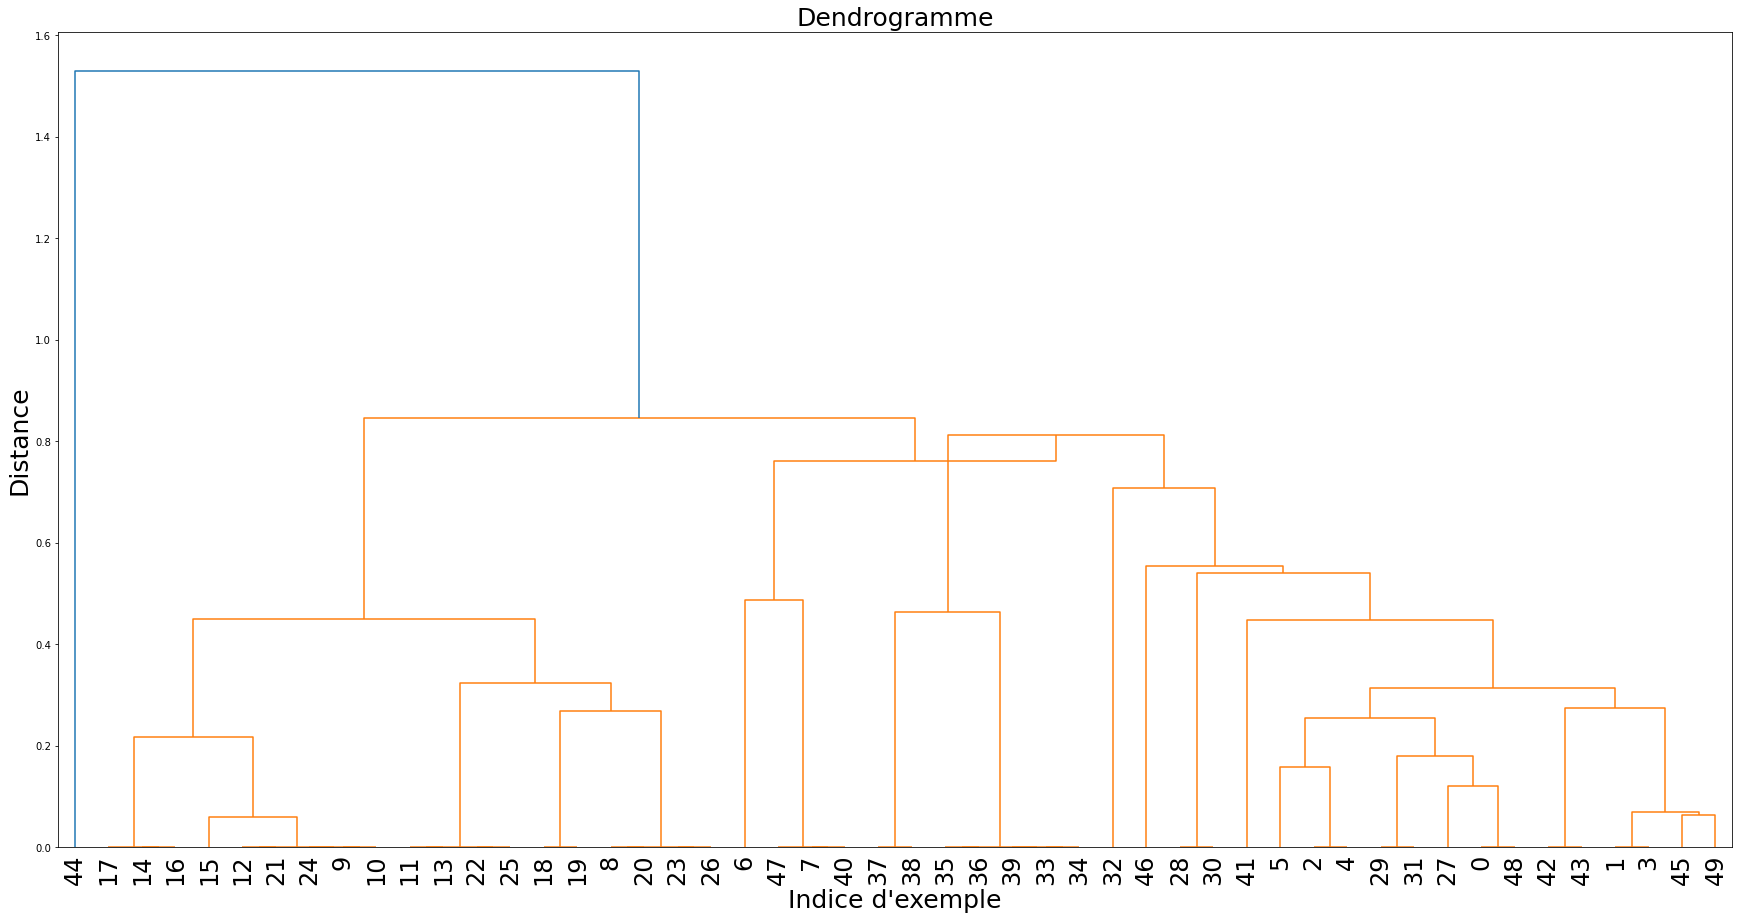

Attribut =   Changement climatique (kg CO2 eq/kg de produit)  :


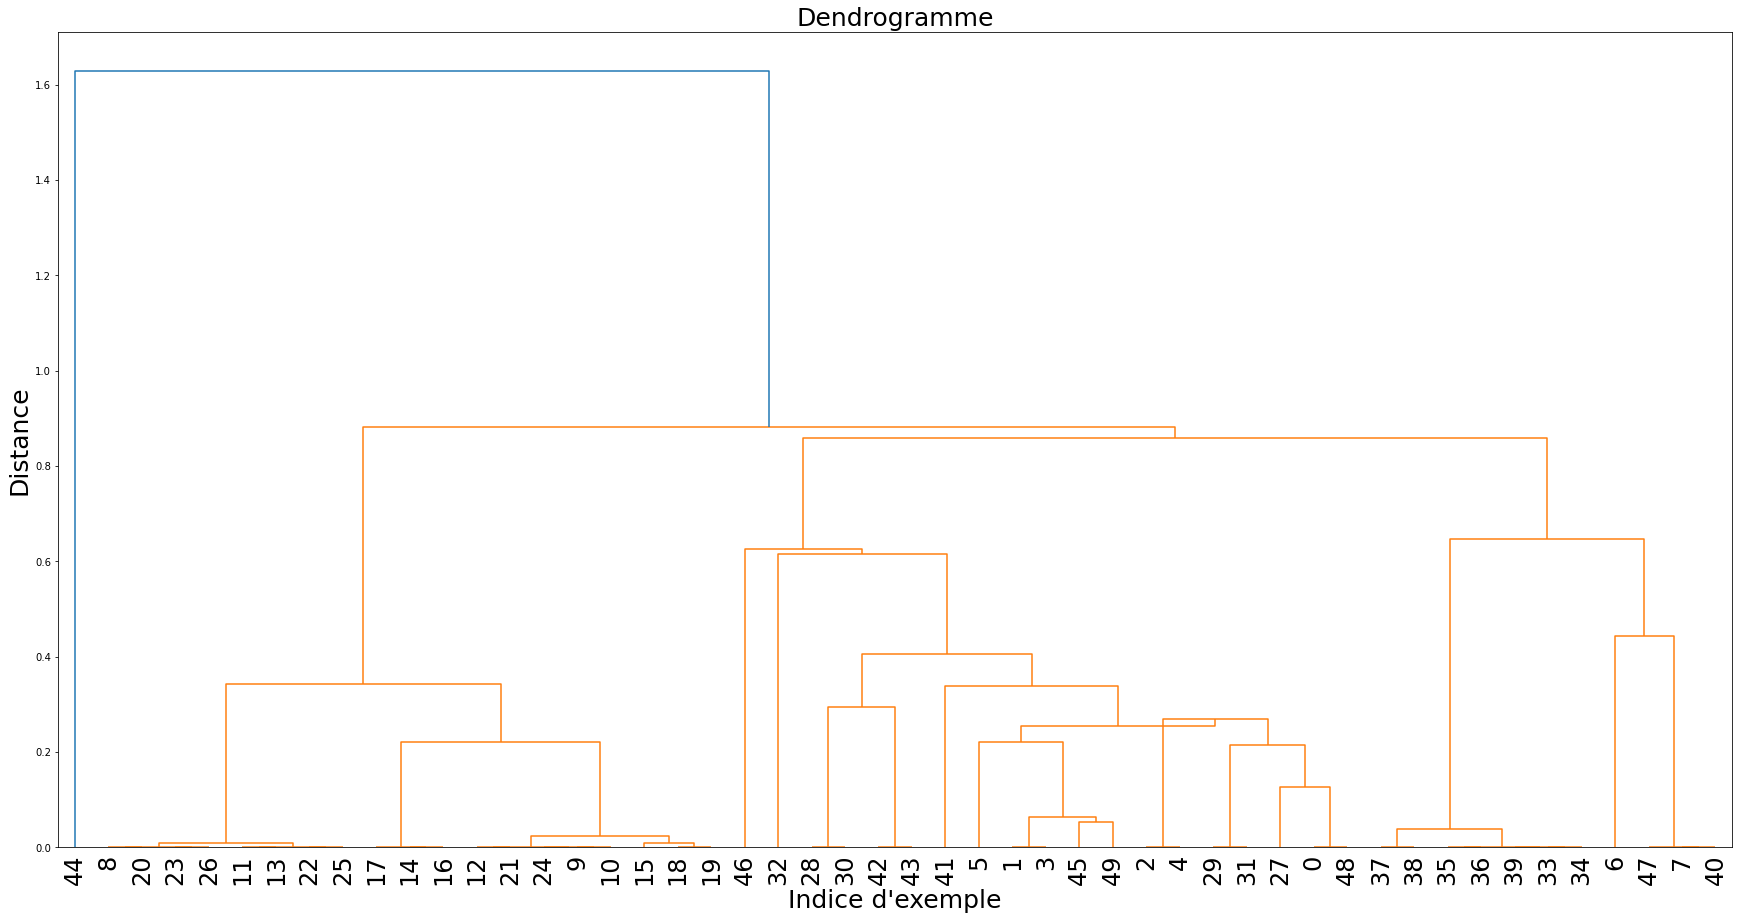

Attribut =   Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)  :


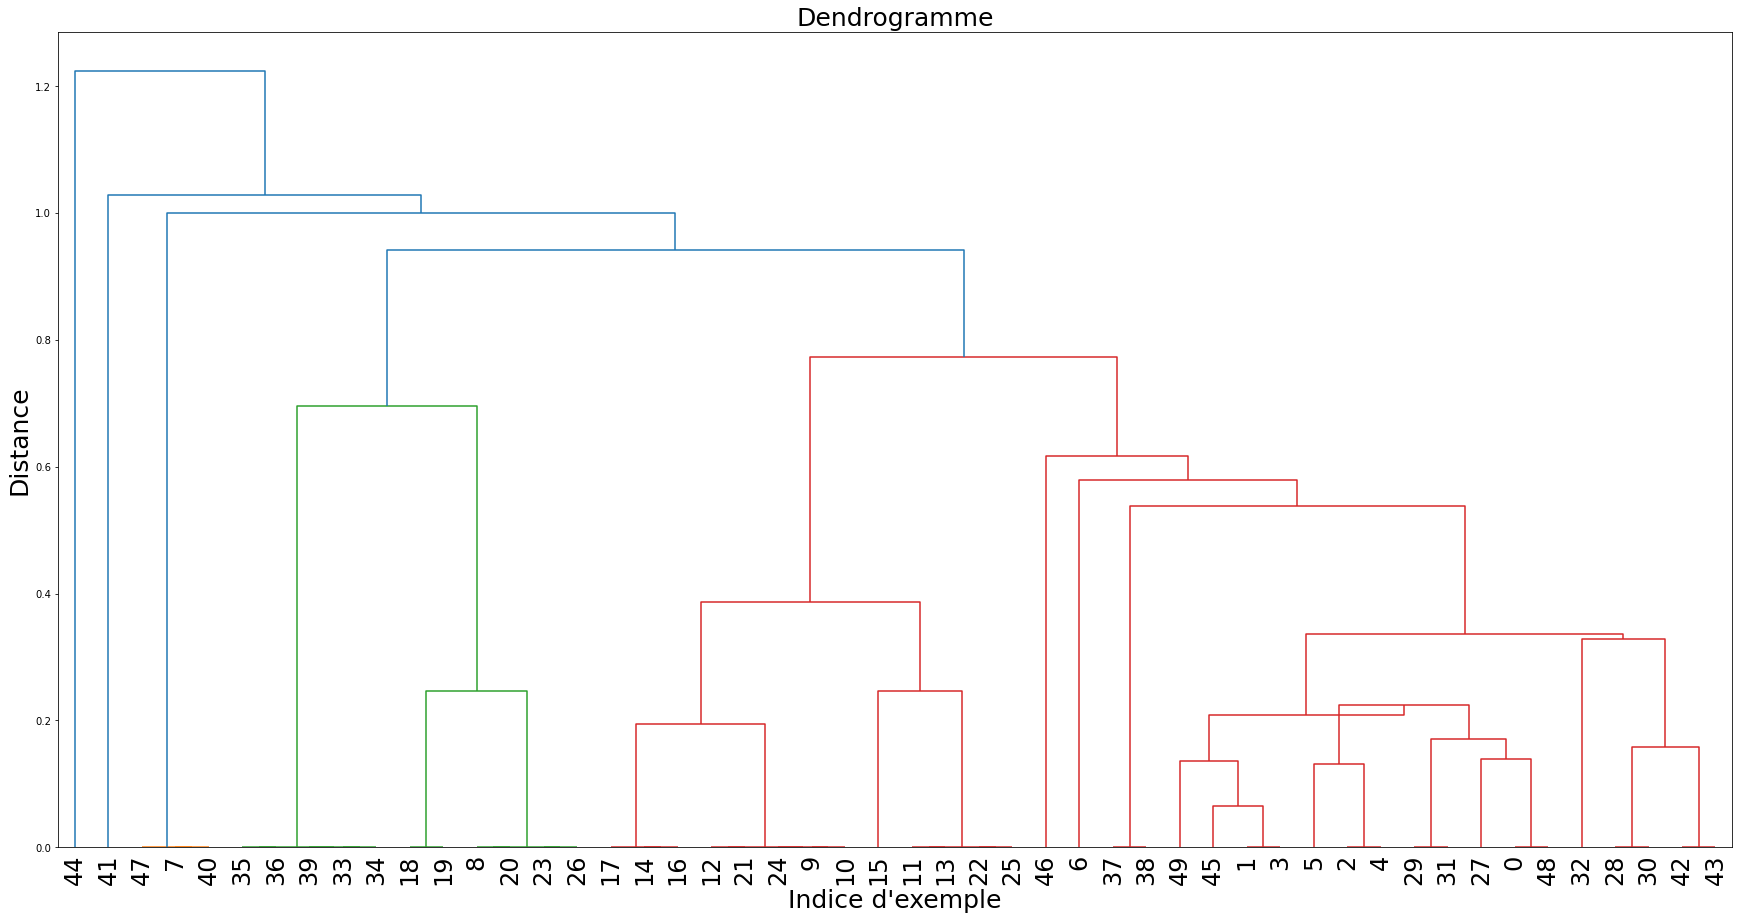

Attribut =   Rayonnements ionisants (kBq U-235 eq/kg de produit)  :


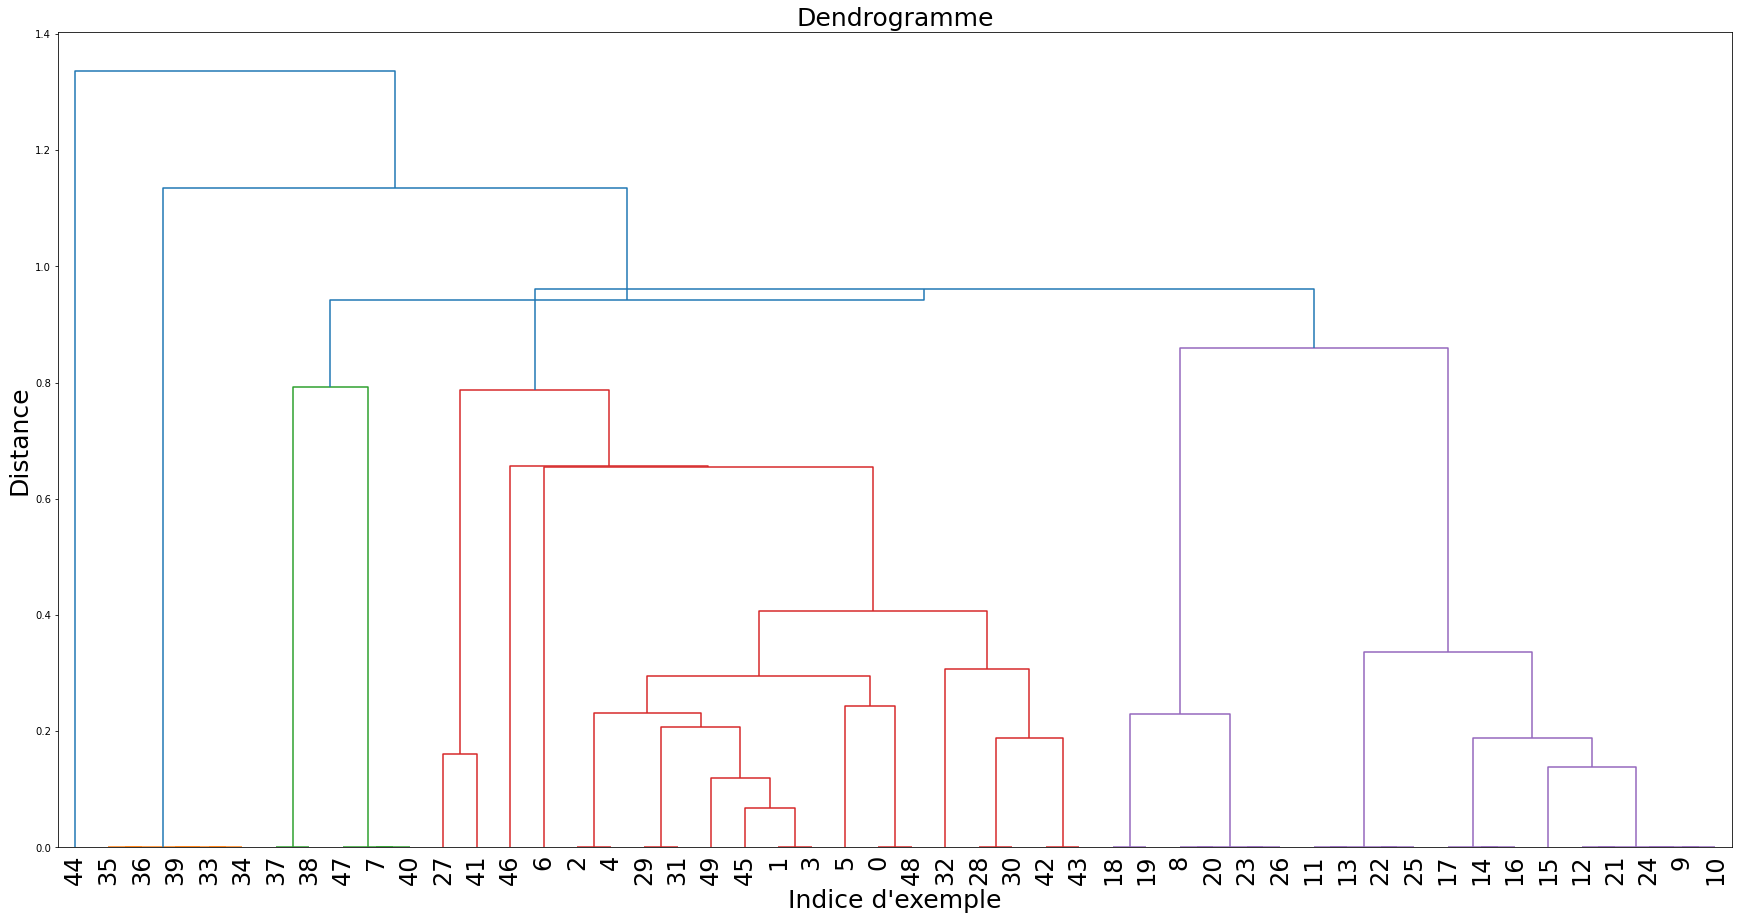

Attribut =   Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)  :


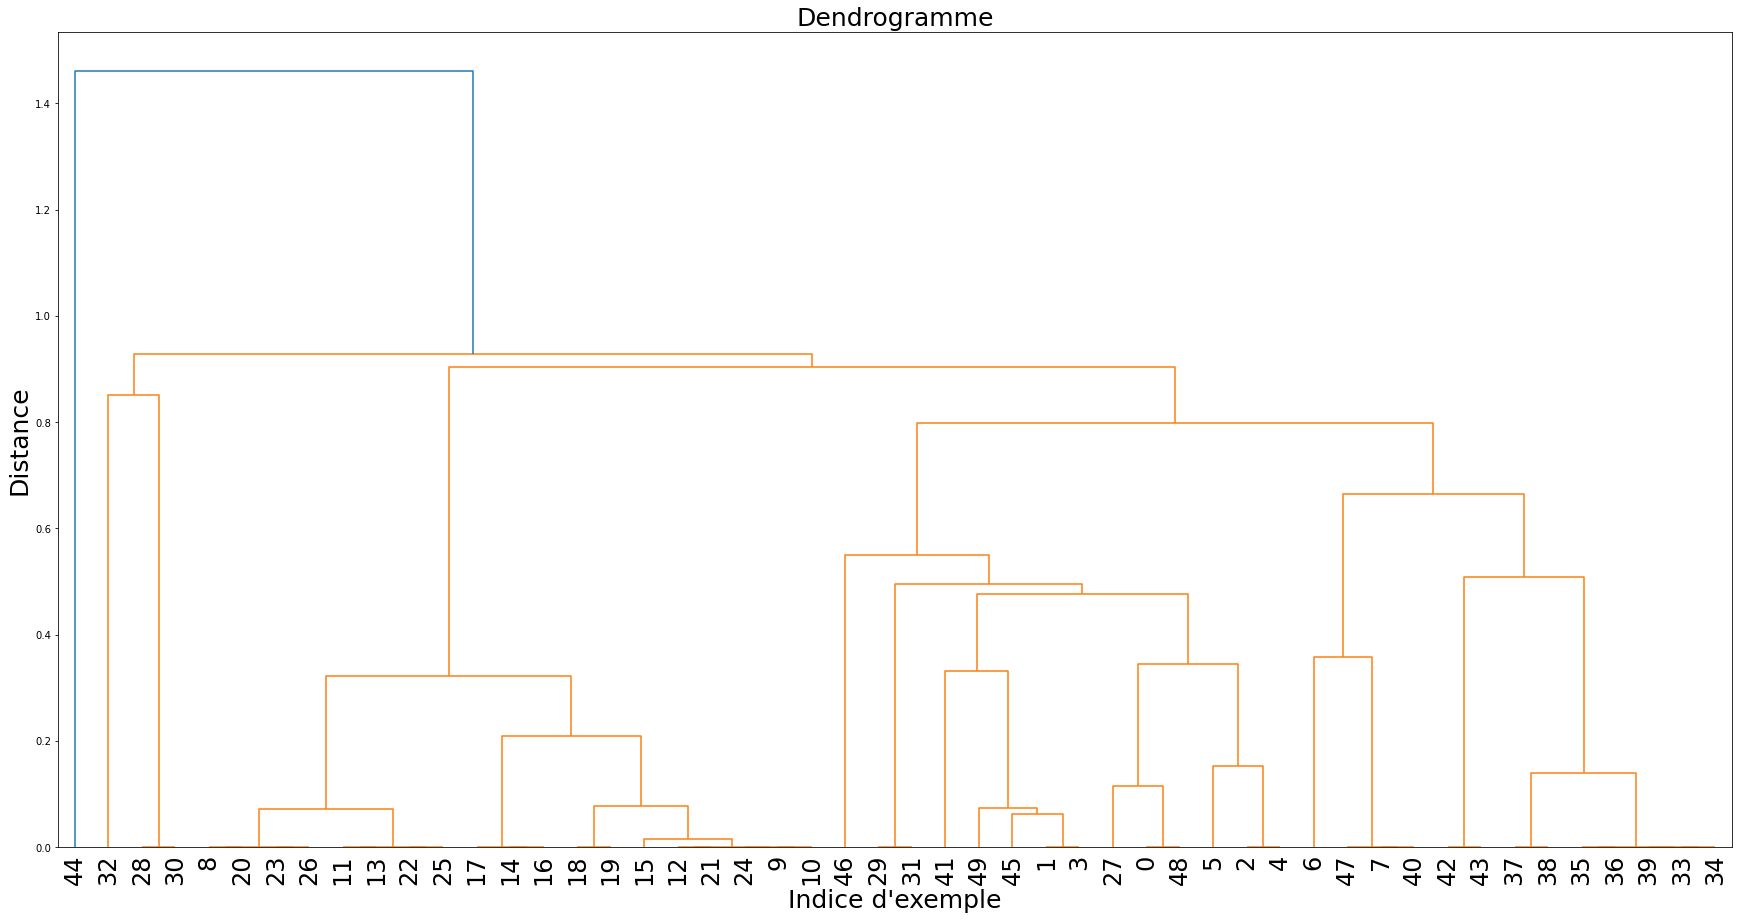

Attribut =   Particules (E-06 disease inc./kg de produit)  :


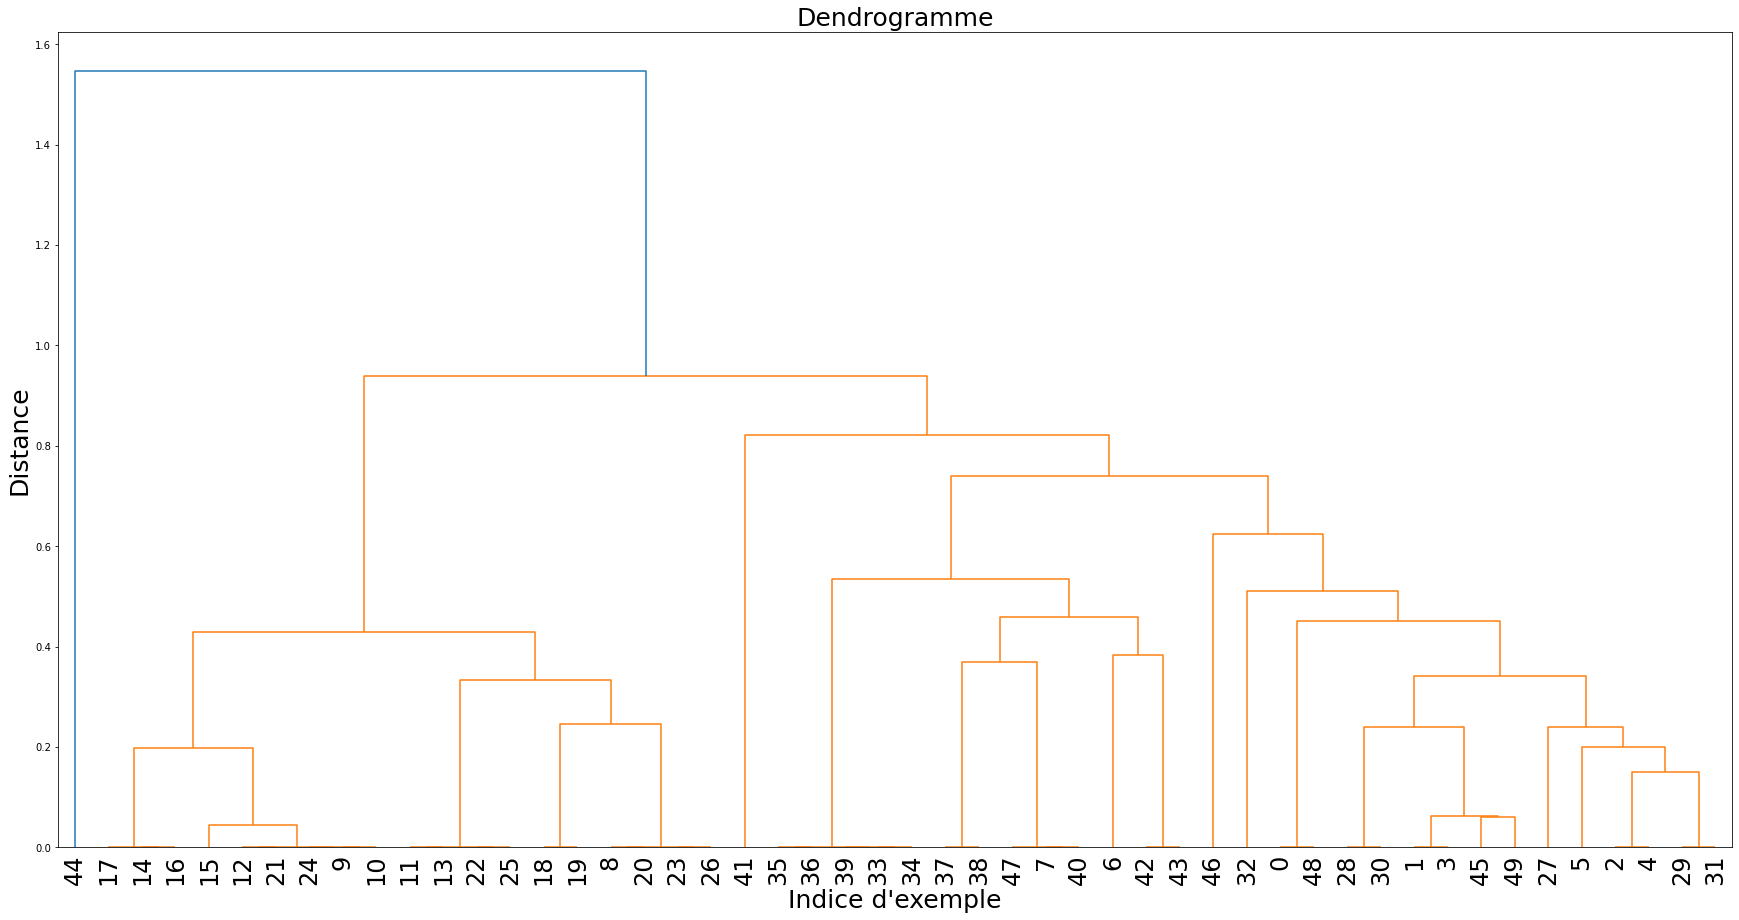

Attribut =   Acidification terrestre et eaux douces (mol H+ eq/kg de produit)  :


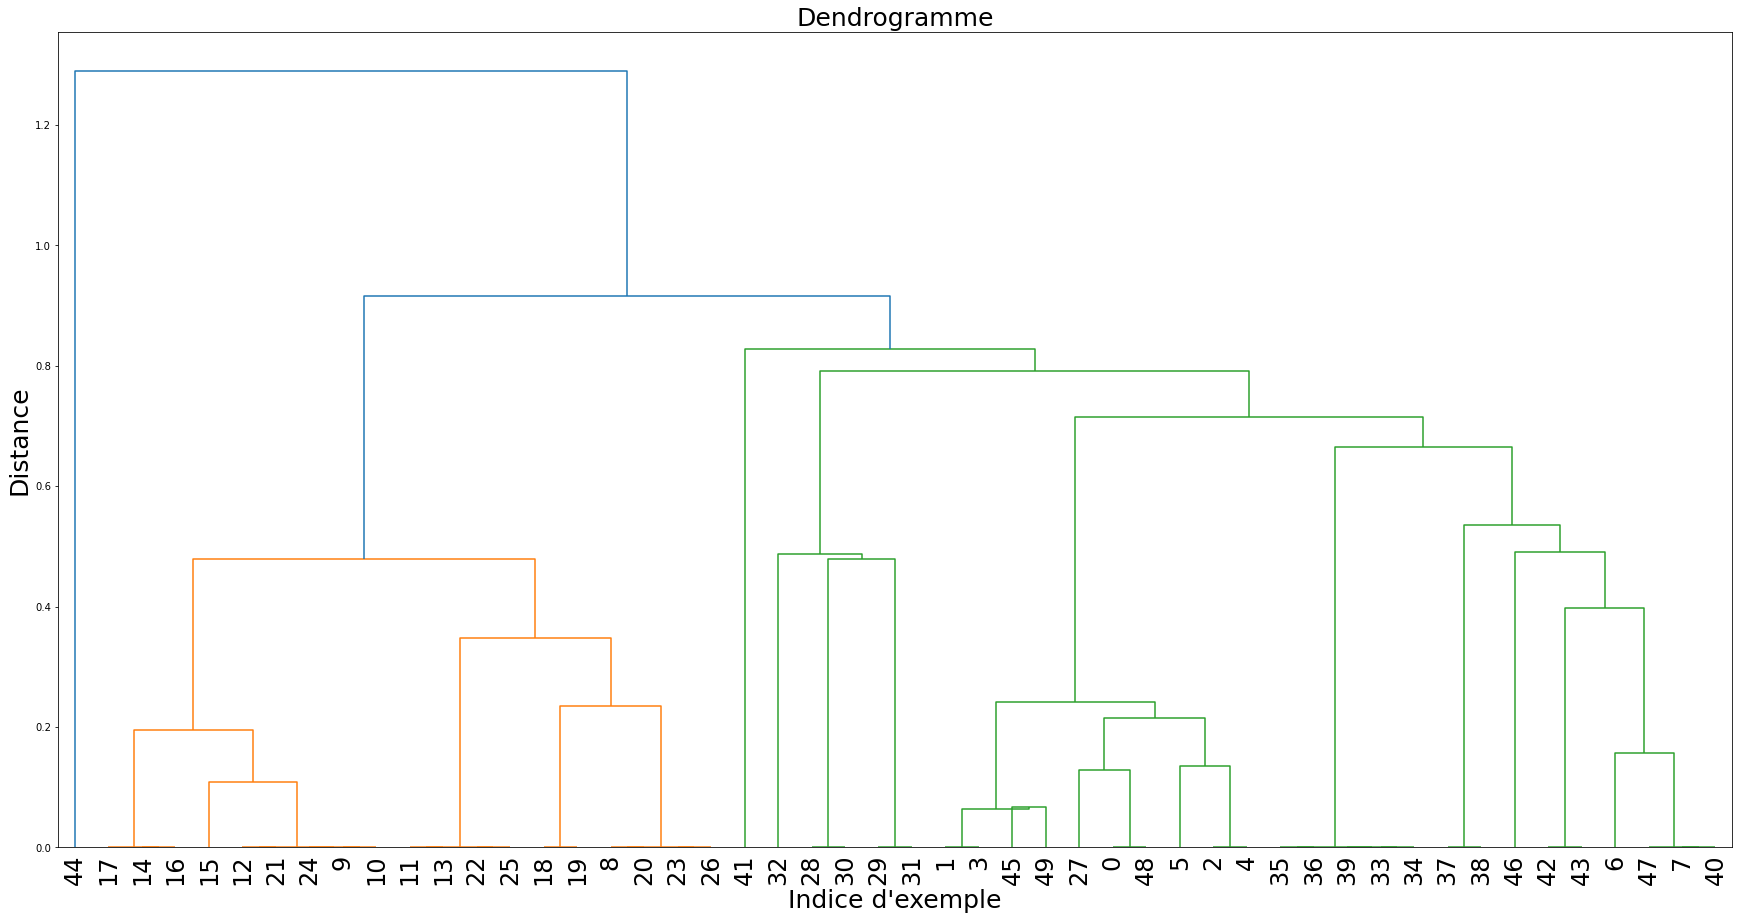

Attribut =   Eutrophisation terreste (mol N eq/kg de produit)  :


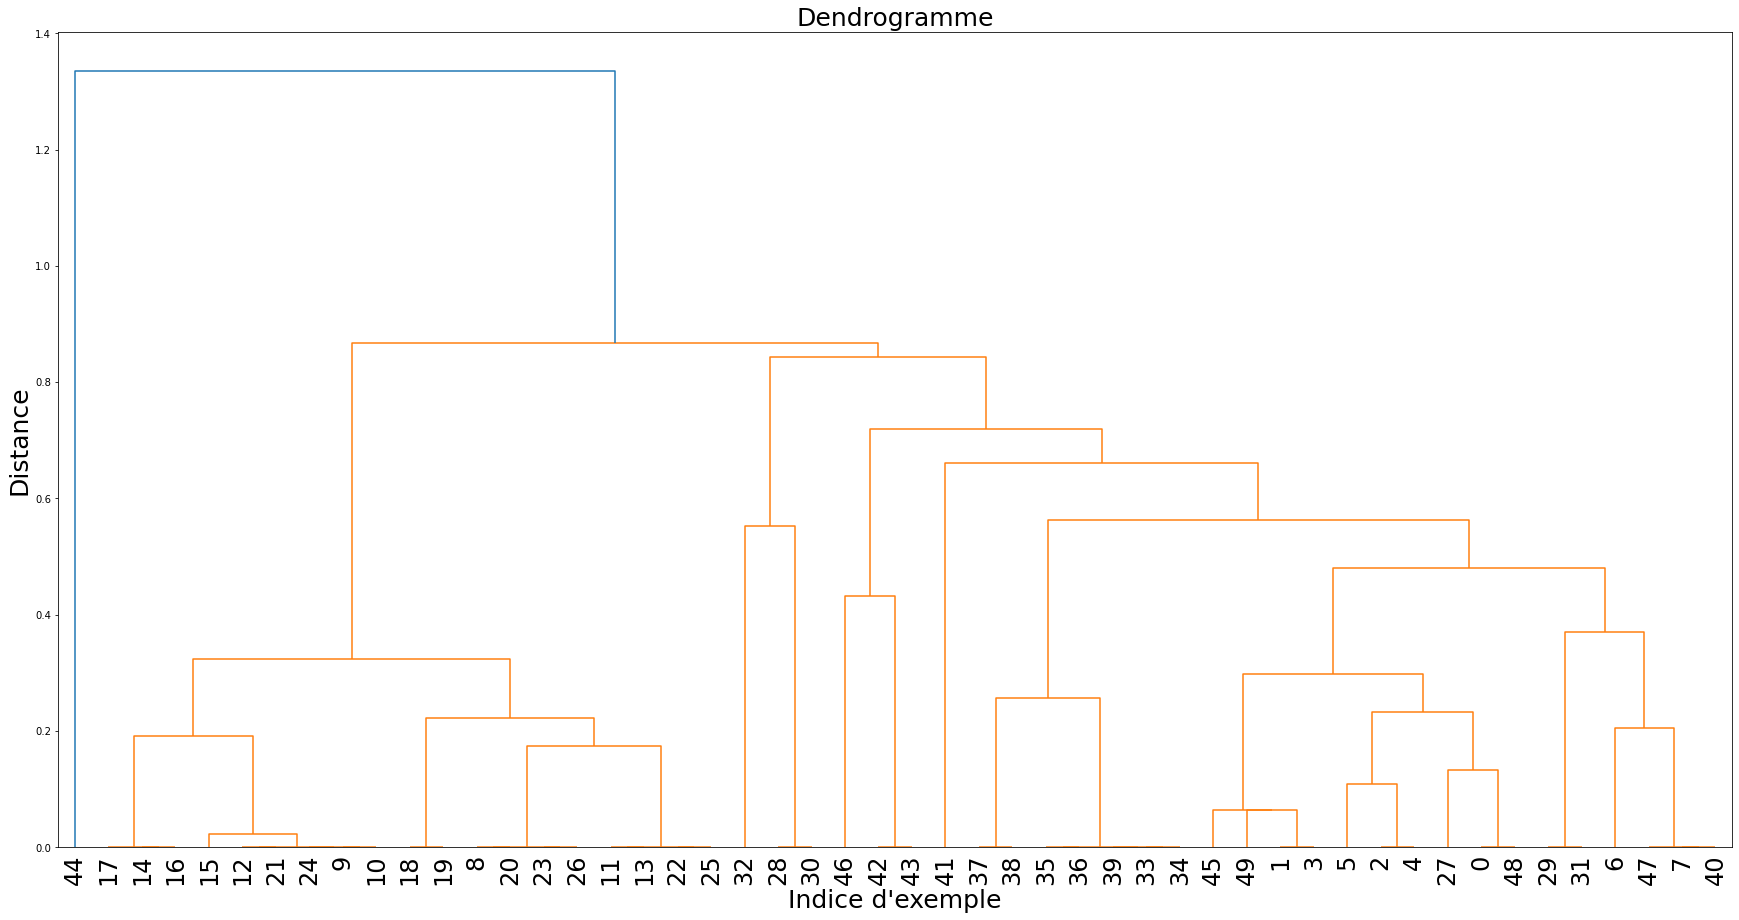

Attribut =   Eutrophisation eaux douces (E-03 kg P eq/kg de produit)  :


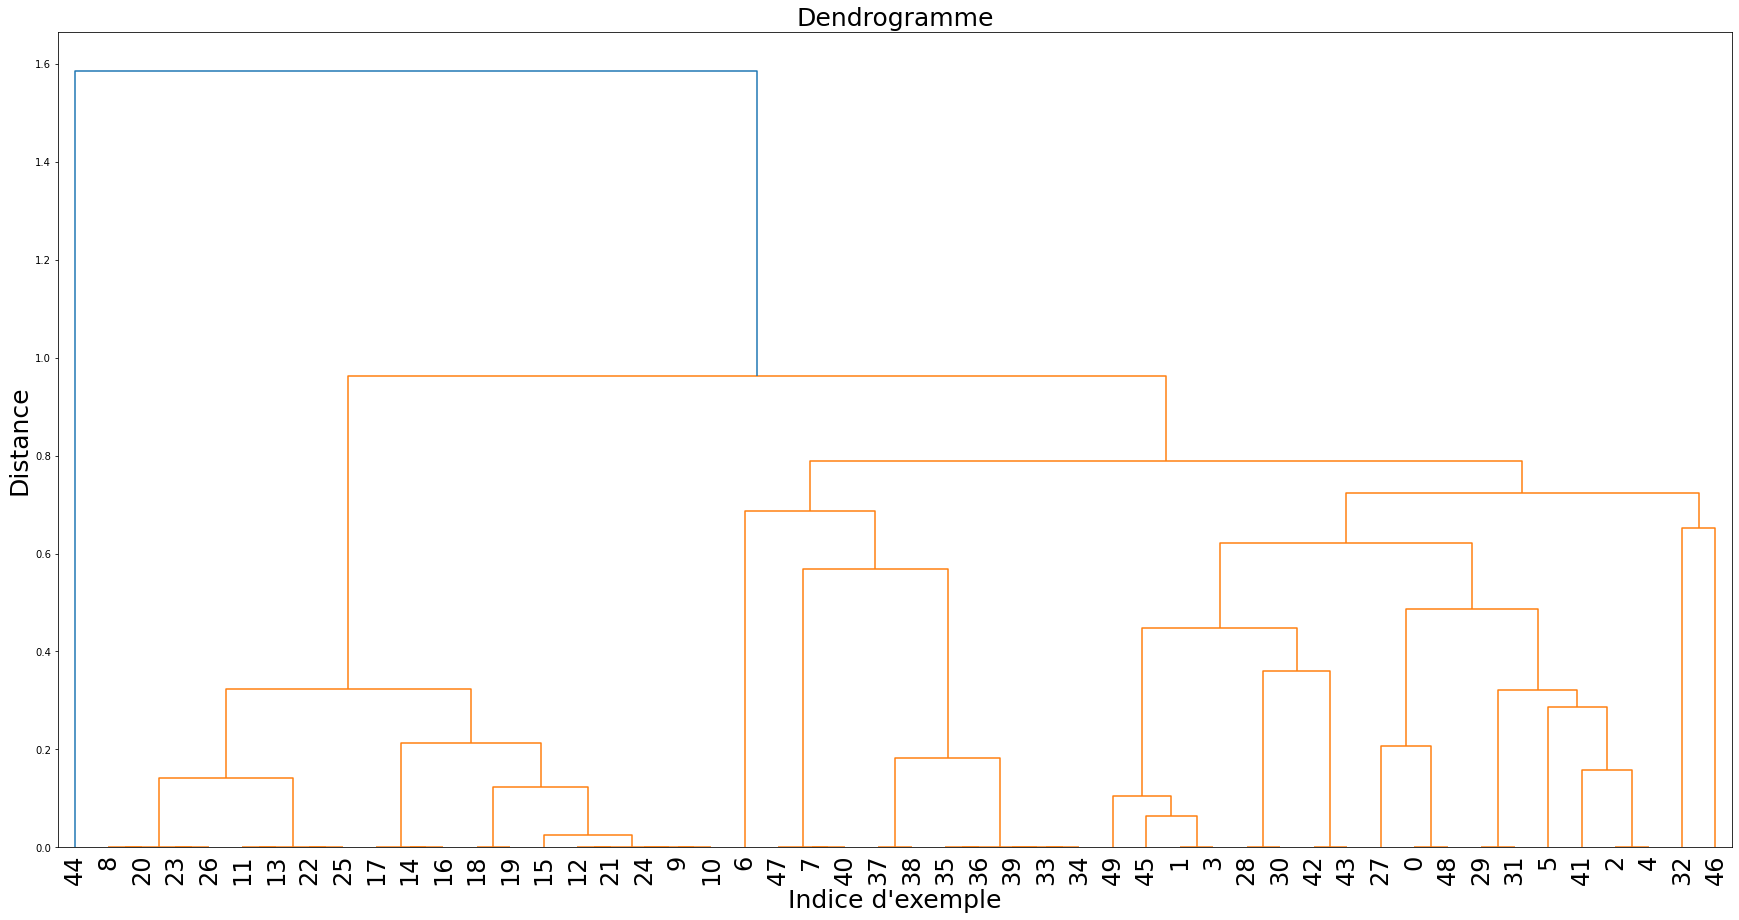

Attribut =   Eutrophisation marine (E-03 kg N eq/kg de produit)  :


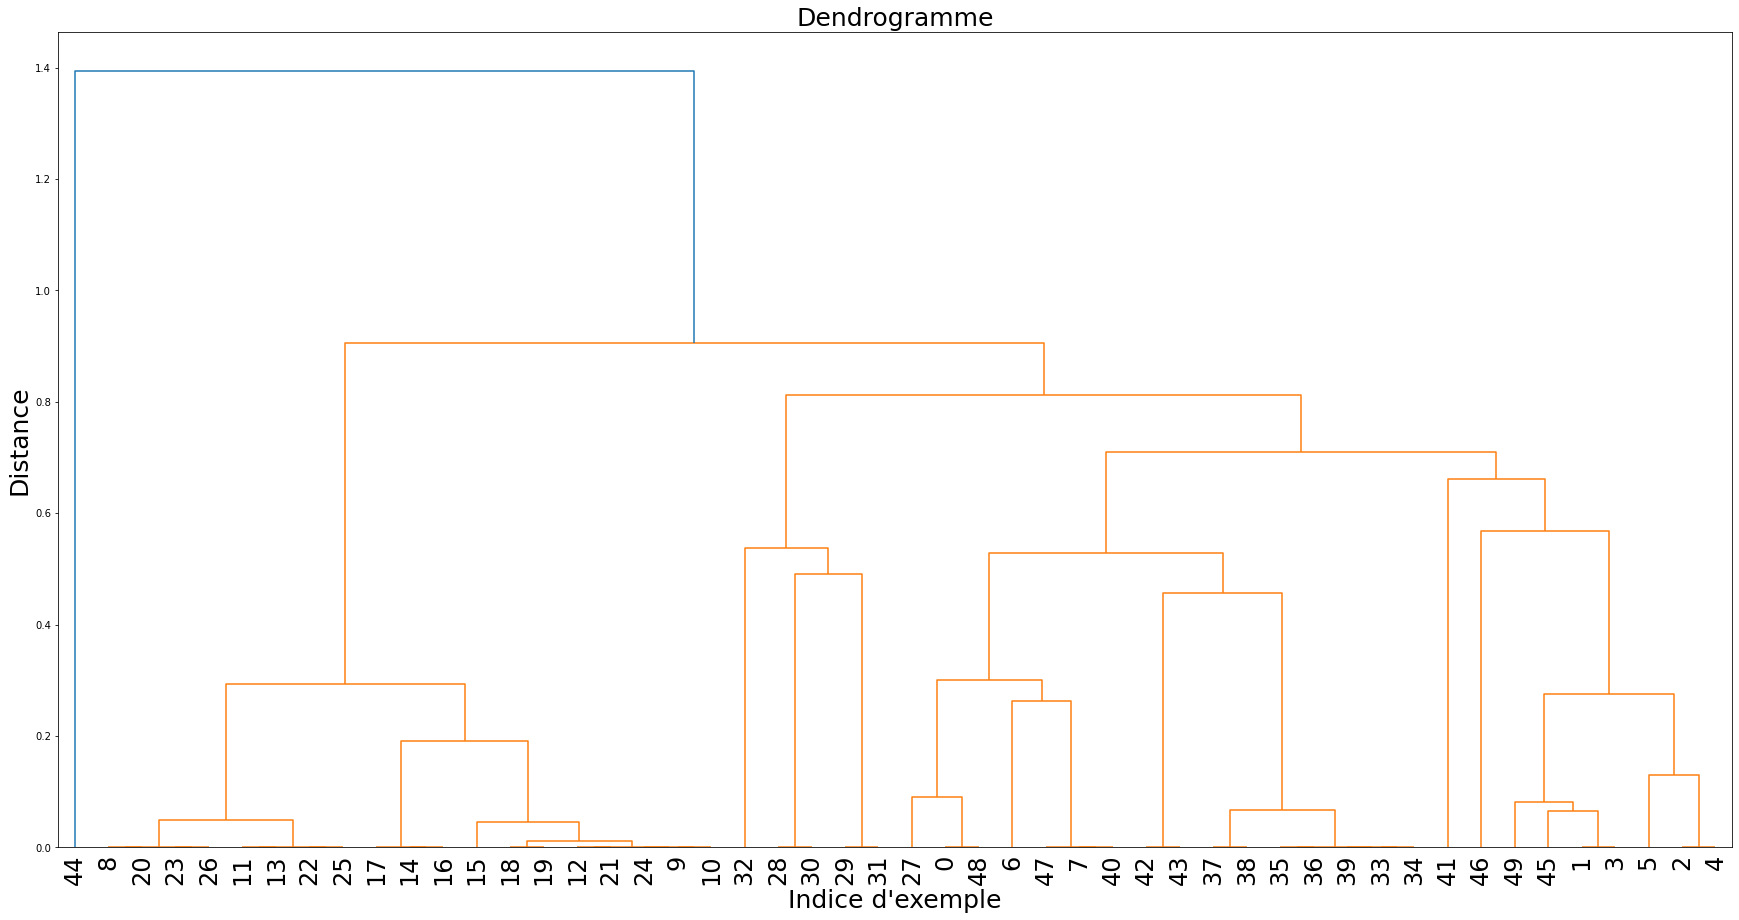

Attribut =   Utilisation du sol (Pt/kg de produit)  :


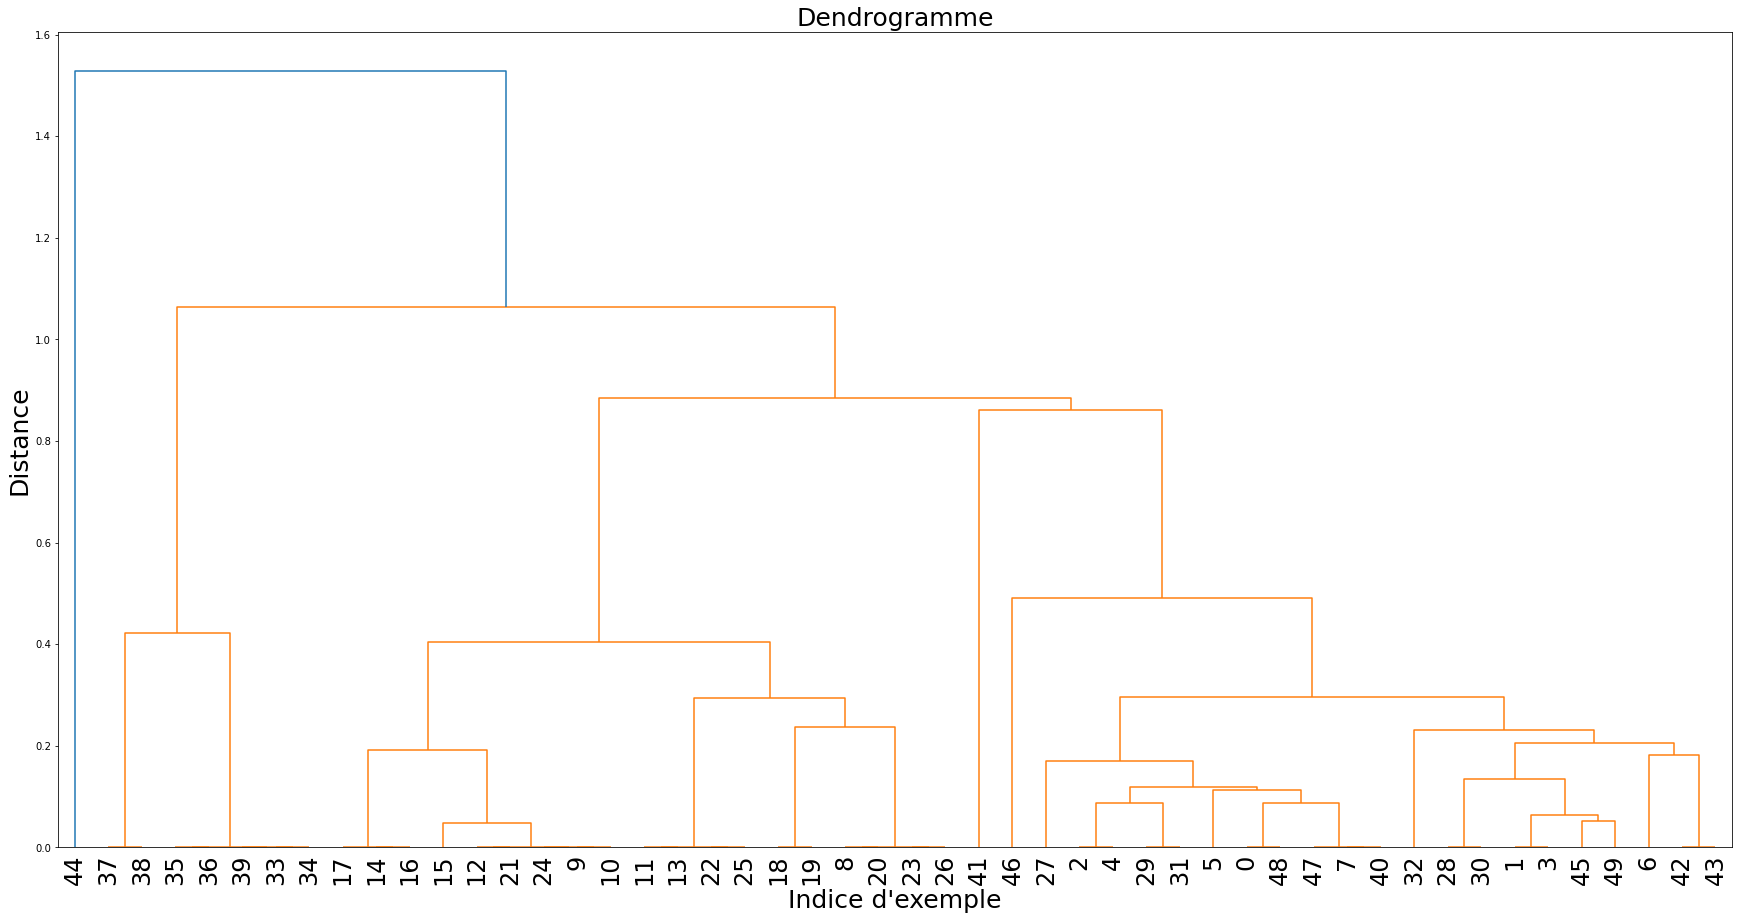

Attribut =   Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)  :


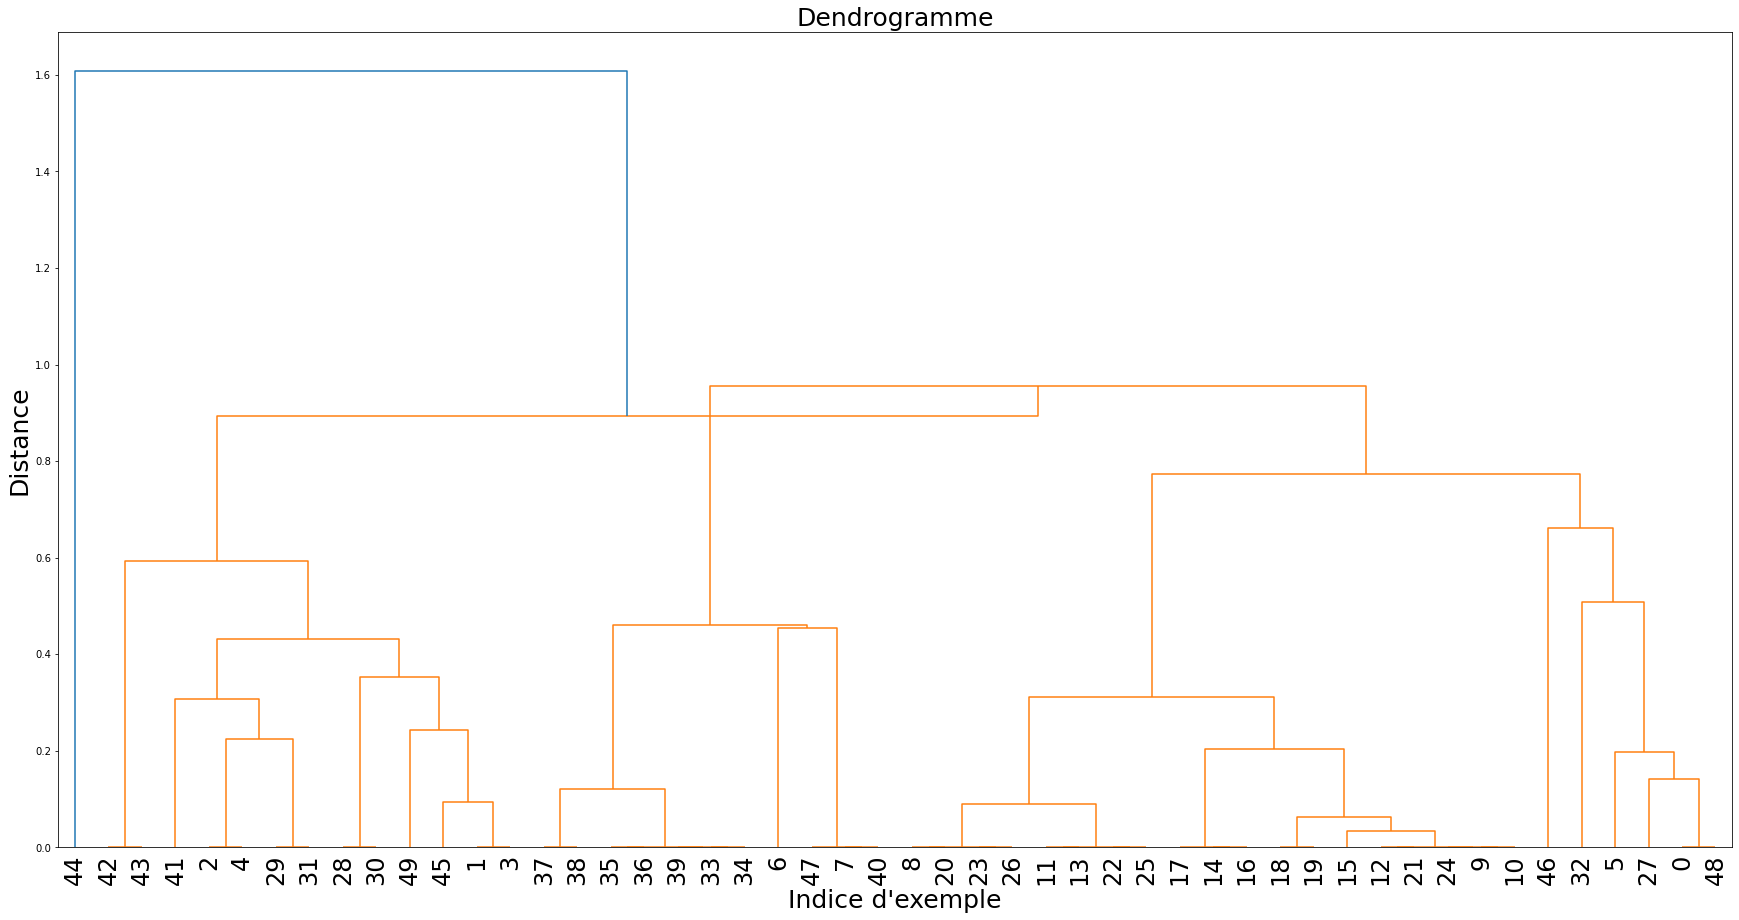

Attribut =   Épuisement des ressources eau (m3 depriv./kg de produit)  :


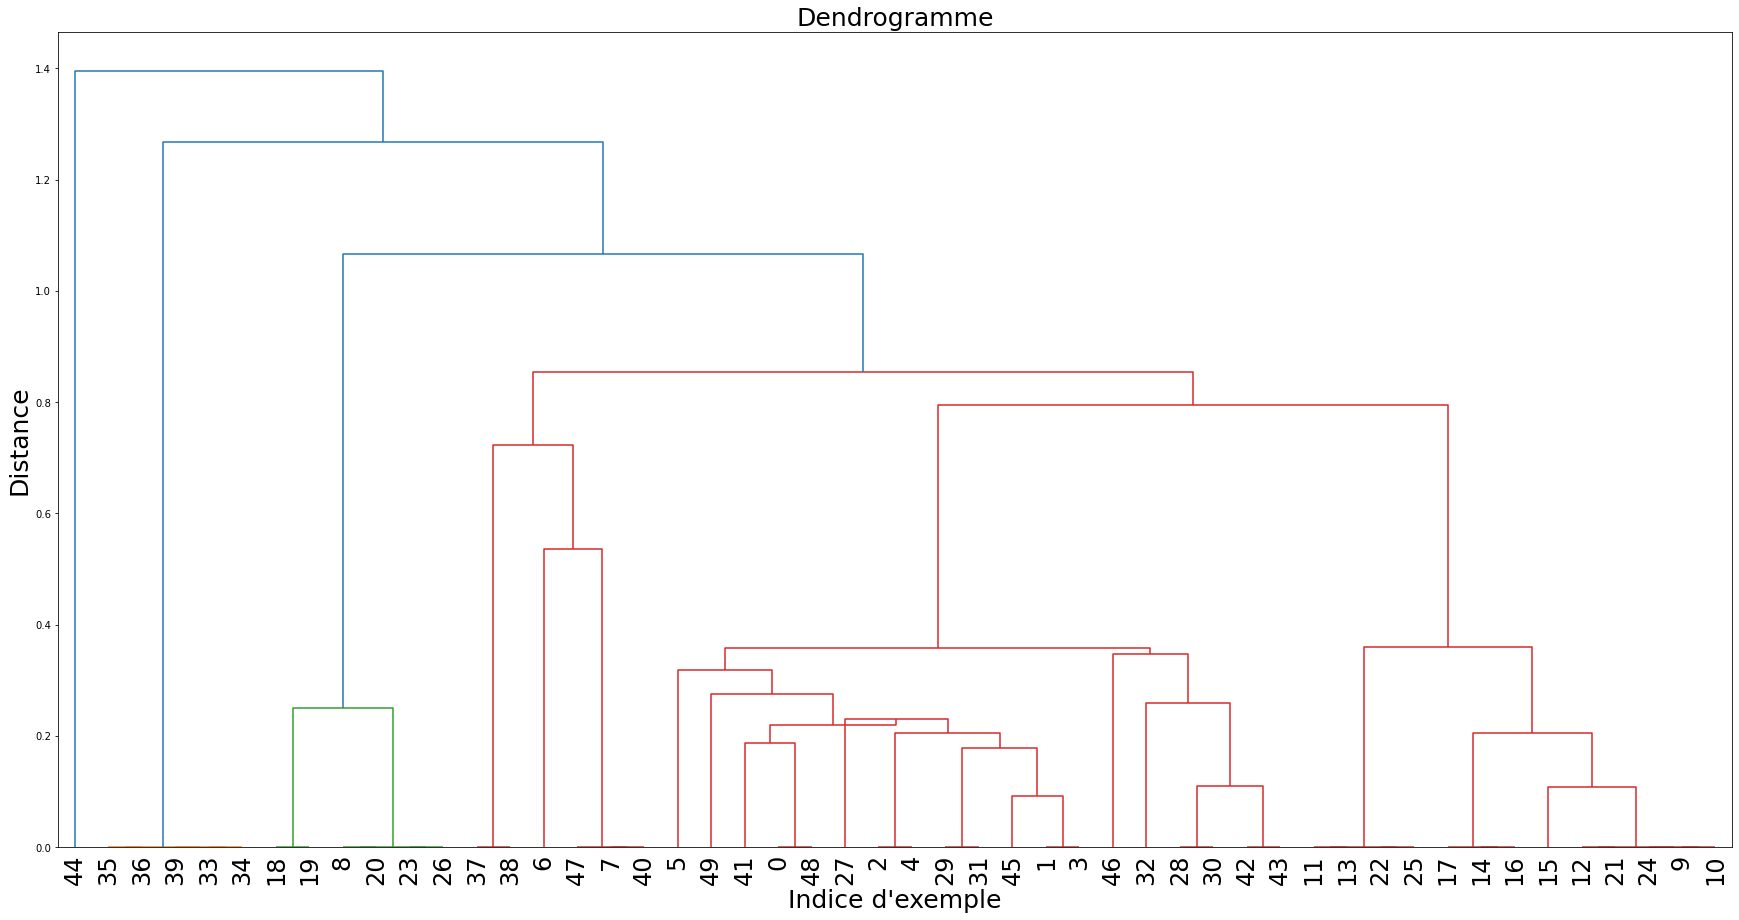

Attribut =   Épuisement des ressources énergétiques (MJ/kg de produit)  :


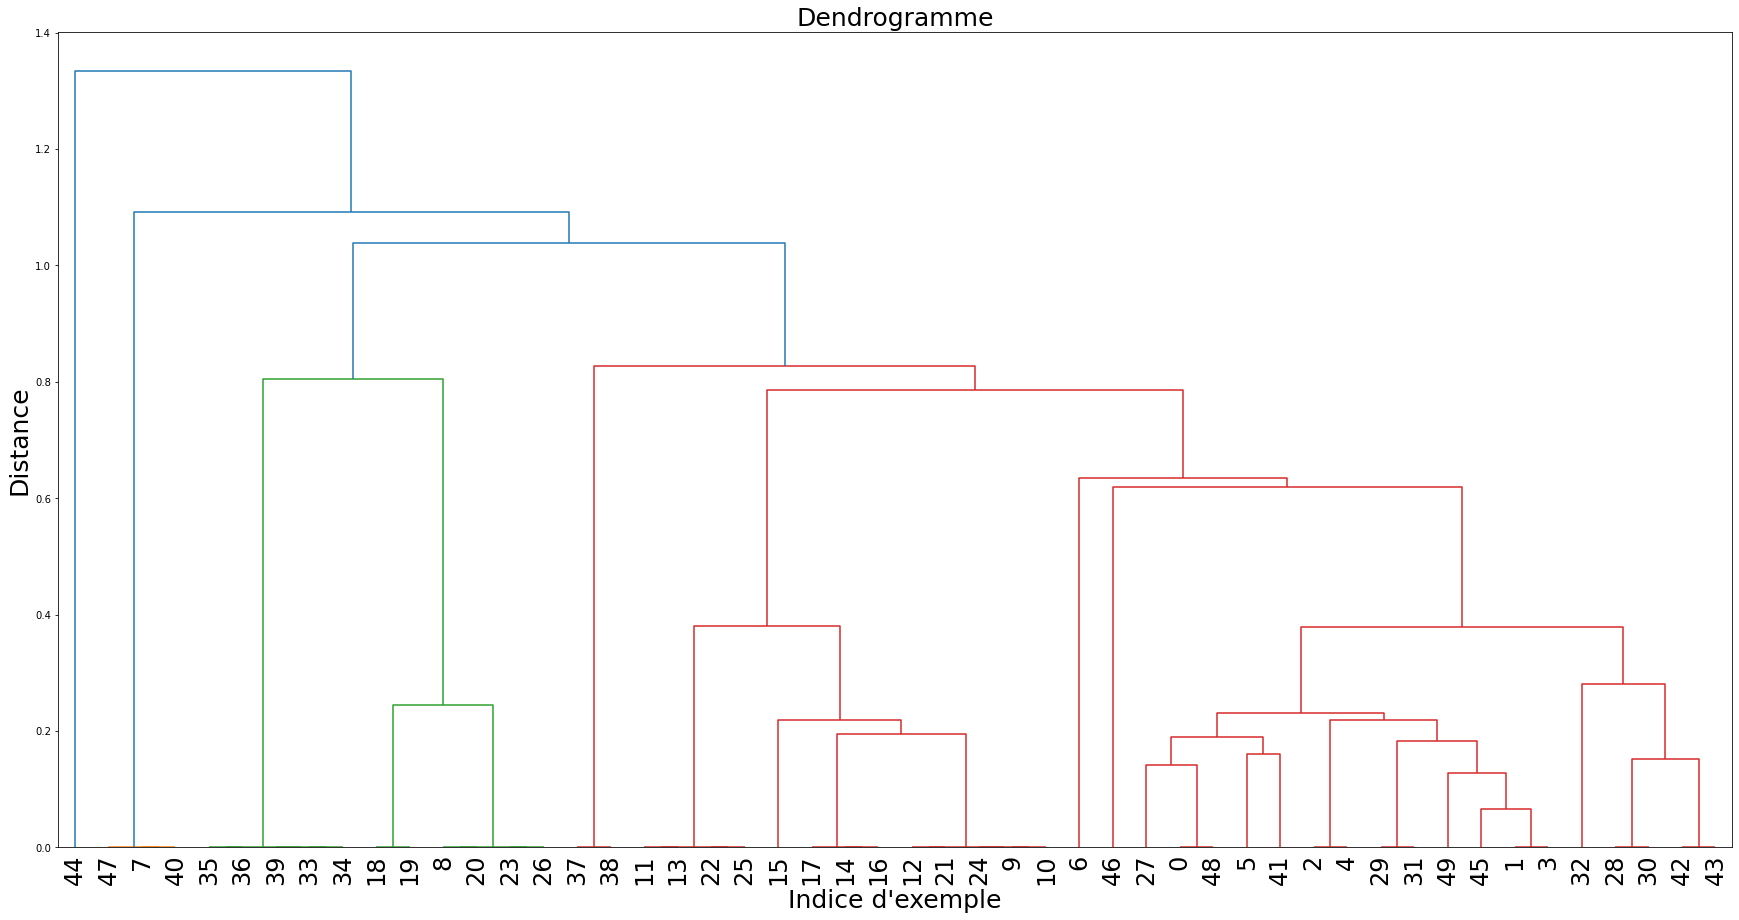

Attribut =   Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)  :


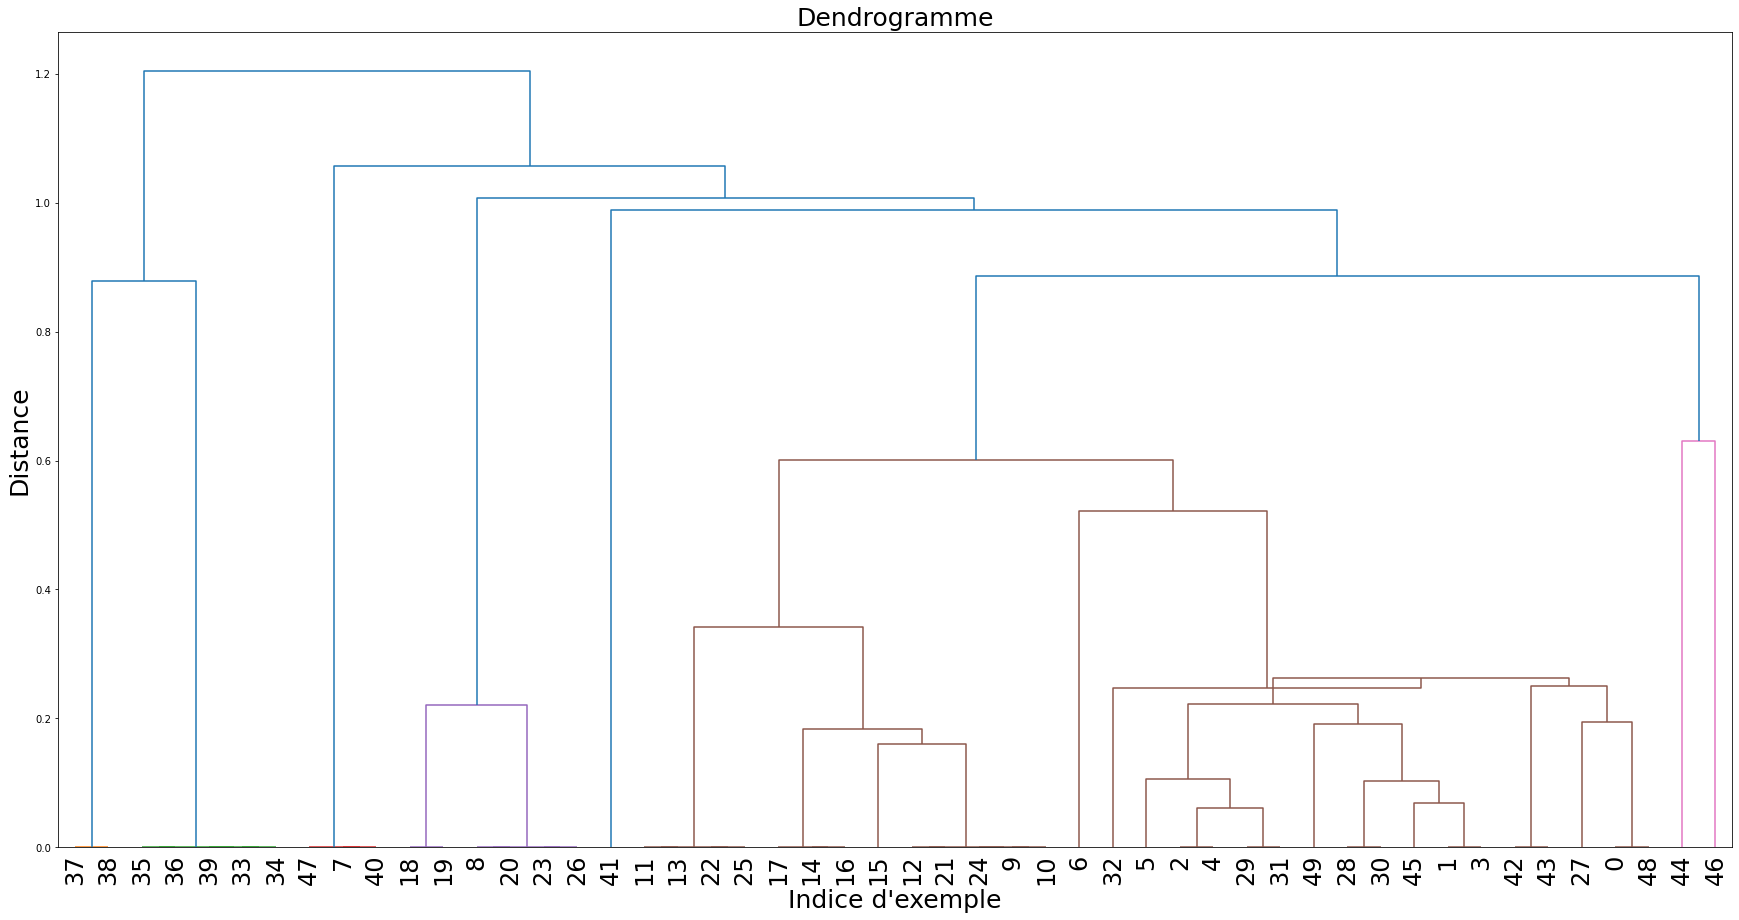

In [453]:
random.seed(42)
np.random.seed(42)

mixed_indexes = [i for i in range(len(data_etape_fiable))]
mixed_indexes = mixed_indexes[:50]

smaller_dataset = data_etape_fiable.iloc[mixed_indexes]

labels_noms = smaller_dataset["Groupe d'aliment"].unique()
deb = 8

results = []

for j in range(15):
    print("Attribut =  ", column_names[j], " :")
    clustering_data = clust.normalisation(smaller_dataset.iloc[:,deb:deb+6].astype(float))
    results.append(clust.clustering_hierarchique(clustering_data,False,True,"centroide"))
    deb += 6


In [461]:
nbr_classes = smaller_dataset["Sous-groupe d'aliment"].unique()
print(len(nbr_classes))

for i in range(15) :
    print("\n***********************************************************\n")
    print("Attribut =  ", column_names[i], " :")
    clust.clustering_info(data_etape_fiable, results[i], 9, 3)


9

***********************************************************

Attribut =   Score unique EF (mPt/kg de produit)  :
- Cluster  1  :  ['viandes crues' 'viandes cuites']  -  [ 8 11]
- Cluster  2  :  ['algues']  -  [3]
- Cluster  3  :  ['fruits']  -  [1]
- Cluster  4  :  ['charcuteries']  -  [7]
- Cluster  5  :  ['fruits']  -  [2]
- Cluster  6  :  ['boisson alcoolisées' 'fromages' 'fruits' 'légumes' 'plats composés']  -  [1 2 7 4 1]
- Cluster  7  :  ['légumes']  -  [1]
- Cluster  8  :  ['fruits']  -  [1]
- Cluster  9  :  ['légumes']  -  [1]

***********************************************************

Attribut =   Changement climatique (kg CO2 eq/kg de produit)  :
- Cluster  1  :  ['viandes crues' 'viandes cuites']  -  [ 8 11]
- Cluster  2  :  ['fruits' 'légumes']  -  [2 2]
- Cluster  3  :  ['boisson alcoolisées' 'fromages' 'fruits' 'légumes' 'plats composés']  -  [1 2 7 2 1]
- Cluster  4  :  ['fruits']  -  [1]
- Cluster  5  :  ['légumes']  -  [1]
- Cluster  6  :  ['charcuteries']  -  [7]

Nous avons verifié quelles sont les classes de chaque exemple dans chaque cluster, en utilisant des colonnes différentes (6 colonnes à chaque fois avec attribut différent).

En analysant les dendrogrammes, et en coupant au milieu le dendrogramme, on a estimé le nombre de clusters optimal et on a trouvé **la valeur 9.** Cette valeur, est **la meme que le nombres de valeurs uniques de la colonne `Sous-groupe d'aliment` de l'echantillon, du coup, nous l'avons fixée en paramètre dans la fonction `clustering_info`**.

En analysant les différentes partitions des clusters, certains groupes d'attributs réuissisent à bien classifier les elements, alors que d'autres ne sont pas assez puissants.

Prenons l'exemple suivant :

- La partition selon le groupe d'attributs = `Eutrophisation marine (E-03 kg N eq/kg de produit)` n'a pas reuissi a differencier entre `charcuteries` et `légumes` dans le **Cluster 5.**
- Par contre, la partition selon le groupe d'attributs = `Particules (E-06 disease inc./kg de produit)` a reuissi à differencier entre ces derniers sur des clusters différents. 


**Il est a noter que certains produits alimentaires sont plus faciles à séparer, tel que la viande (à cause du nombre de produits de viande assez élevé dans la base de données). C'est pour cette raison qu'on remarque une bon clustering des viandes peu importe l'attribut utilisé.**


Ces résultats sont assez logiques et cohérents avec ceux qu'on a trouvé dans la partie **supervisée** lorsqu'on a classifié les attributs du plus discriminant au moins discriminant.

In [ ]:
# AUTRES METHODES DE LINKAGE
'''
for i in range(15) :
    print("\n***********************************************************\n")
    print("Attribut =  ", column_names[i], " :")
    print("LINKAGE METHOD: SIMPLE")
    clust.clustering_info(data_etape_fiable, results[i], 9, 3)
    print("***********************************************************")
    print("LINKAGE METHOD: COMPLETE")
    clust.clustering_info(data_etape_fiable, results[i], 9, 3)
    print("***********************************************************")
    print("LINKAGE METHOD: AVERAGE")
    clust.clustering_info(data_etape_fiable, results[i], 9, 3)
    print("***********************************************************")
    print("***********************************************************")
'''

### 5.2.2. Algorithme K-moyennes (K-means)

Nous allons reprendre le meme raisonnement que celui utilisé pendant l'analyse de `data_synthese`

**Avant de commencer**, nous allons reconstruire le jeu de données, il n'est plus nécessaire de réduire le nombre d'exemples à prendre, car la fonction `kmoyennes` est **assez rapide**. 

Nous  allons alors générer un jeu de données appelé `clustering_data` qui va contenir les différentes colonnes qui décrivent un certain attribut sur chaque étape.

**On va fixer la valeur de K à 27, puisque c'était une bonne valeur pour `data_snyhtese.csv`, et puisque `data_étape.csv` est la même base de données que `data_snyhtese.csv`, juste avec plus de colonnes, nous n'avons pas trouvé une raison pour changer la valeur de K et passer beaucoup de temps sur des tests énormes!**



In [32]:
random.seed(42)
np.random.seed(42)

mixed_indexes = [i for i in range(len(data_etape_fiable))]

smaller_dataset = data_etape_fiable.iloc[mixed_indexes]

labels_noms = smaller_dataset["Groupe d'aliment"].unique()

deb = 8

dunn_indexes = []
xb_indexes = []
k_values = []


for j in range(15):
    print("Attribut =  ", column_names[j], " :")
    clustering_data = clust.normalisation(smaller_dataset.iloc[:,deb:deb+6].astype(float))
    les_centres, l_affectation = clust.kmoyennes(27, clustering_data, 0.05, 100)

    deb += 6

    # Affichage des groupe de produits de chaque element de chaque Cluster, serve a voir comment se sont groupé les produits
    '''
    #print("Affichage des centres: ",les_centres)
    #print("Affichage des affectations: ",l_affectation)

    print("************************************** K = ", 27)

    for i in range(len(les_centres)) :
        tmp = []
        for j in l_affectation[i] :
            tmp.append(data_synthese_fiable.iloc[j,2])
        tmp = np.array(tmp)
        valeurs, nb_fois = np.unique(tmp,return_counts=True)
        print(valeurs,nb_fois)
        print("**************************************************************")
    '''    

    valeur = clust.index_Dunn(clustering_data, les_centres, l_affectation)
    valeur2 = clust.index_xie_beni(clustering_data, les_centres, l_affectation)

    print("Valeur de K = ", 27,  "\t- DUNN : ", valeur, "\t- XIE BENI : ", valeur2)

    dunn_indexes.append(valeur)
    xb_indexes.append(valeur2)
    
    print("**************************************************************************\n")





Attribut =   Score unique EF (mPt/kg de produit)  :
Valeur de K =  27 	- DUNN :  0.03230041261721647 	- XIE BENI :  326.4745813591846
**************************************************************************

Attribut =   Changement climatique (kg CO2 eq/kg de produit)  :
Valeur de K =  27 	- DUNN :  0.04224244033690844 	- XIE BENI :  209.6596880730077
**************************************************************************

Attribut =   Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)  :
Valeur de K =  27 	- DUNN :  0.015833033681345487 	- XIE BENI :  672.7122458905939
**************************************************************************

Attribut =   Rayonnements ionisants (kBq U-235 eq/kg de produit)  :
Valeur de K =  27 	- DUNN :  0.08173928680680562 	- XIE BENI :  237.81359461120718
**************************************************************************

Attribut =   Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)  :
Valeur de K =  

In [33]:
print("Meilleur groupe d'attributs selon l'indice de Dunn : ", column_names[dunn_indexes.index(max(dunn_indexes))])
print("Meilleur groupe d'attributs selon l'indice de Xie-Beni : : ", column_names[xb_indexes.index(min(xb_indexes))])

Meilleur groupe d'attributs selon l'indice de Dunn :  Rayonnements ionisants (kBq U-235 eq/kg de produit)
Meilleur groupe d'attributs selon l'indice de Xie-Beni : :  Eutrophisation eaux douces (E-03 kg P eq/kg de produit)


Ces résultats sont différents de ceux quand a obtenu par clustering hiearchique. **Nous avons fixer la valeur de K à 27.**

Selon `l'indice de dunn`, le groupe d'attributs : `Rayonnements ionisants` donne les meilleurs résultats puisque c'est la valeur MAX. Par contre, le groupe d'attributs : `Eutrophisation eaux douces (E-03 kg P eq/kg de produit)` donne les meilleurs results selon `l'indice de Xie-Beni` (MIN).

# 5. Experimentions sur Data Ingrédients

## 5.1 Supervisé

Dans le fichier `data_ingredients.csv`, on observe qu'il ressemble au fichier `data_synthese.csv.`
La différence c'est qu'il présente une colonne de plus qui est **Ingrédients**. Donc, chaque groupe d'aliment peut avoir des sous-groupes différents qui eux-mêmes sont constitués de multiples ingrédients.
Dans cette partie, nous allons regarder si les ingrédients aident vraiment à la bonne prédiction ou bien si, dans le cas contraire, on en aura pas besoin.

On va premièrement essayer de classifier les produits en se basant sur :
- les colonnes ingrédients et score unique comme dest_set.

Ensuite : 
- on exclut la colonne ingrédients du desc_set et on observera si l'accuracy augmente ou diminue.

Si celle-ci diminue c'est que l'ingrédient est un attribut important pour la bonne classification des données.

**Nb! On fixe entropie à 0.2 car le calcul prend beaucoup de temps vue la taille énorme des données après le one_hot_encoding.**

In [46]:
#print(data_ingredient.columns)
print("Nombre de colonnes: ",len(data_ingredient))
print(len(data_ingredient["Ciqual AGB"].unique()))
print(len(data_ingredient["Sous-groupe d'aliment"].unique()))

Nombre de colonnes:  5671
1038
44


In [49]:
############################################################################################################
# COLONNES PRISES : INGREDIENTS + TOUTES LES AUTRES COLONNES A PARTIR DE SCORE UNIQUE
############################################################################################################
np.random.seed(42)
random.seed(42)


# Les noms des differents labels
labels_noms = data_ingredient["Groupe d'aliment"].unique()
lines, columns = data_ingredient.shape

# Les colonnes qui vont servir comme caractèristiques des 'x' seront la colonne du score unique EF
# et les colonnes utilisées pour l'arbre catégoriel

columns_noms = list(data_ingredient.columns[6:]) 

X = np.array(data_ingredient.iloc[:,6:])

Y = np.array(data_ingredient.iloc[:,3])

index = np.random.permutation(len(X)) # mélange des index

Xm = X[index]
Ym = Y[index]
Xm_ohe = cl.one_hot_encoder(Xm)


# Création du training set et du test set avec la crossvalidation
niter = 10

acc_nc = []
tacc_nc = []

entropie = 0.2
train_acc = []
test_acc =  []    
for i in range(niter) :

    desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm_ohe, Ym, niter, i)
                    
    arbre_synthese = cl.ClassifierArbreNumerique(desc_set.shape[1], entropie, []) # <------------------ IMPORTANT LINE!
    one_hot_desc = arbre_synthese.train(desc_set,label_set)
    train_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(desc_set,label_set))))
    test_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(tdesc_set,tlabel_set))))
    
print("\n***********************************************")
print("Perf for entropie =  ", float("{0:.1f}".format(entropie)), " :")
print("Accuracies of training set : ", train_acc)
print("Accuracies of test set : ", test_acc)
print("Average accuracy of training set : ", sum(train_acc)/len(train_acc))
print("Average accuracy of test set : ", sum(test_acc)/len(test_acc))
print("***********************************************\n")
    
acc_nc.append(sum(train_acc)/len(train_acc))
tacc_nc.append(sum(test_acc)/len(test_acc))


***********************************************
Perf for entropie =   0.2  :
Accuracies of training set :  [0.9757, 0.9794, 0.9757, 0.9769, 0.9767, 0.9738, 0.974, 0.9757, 0.9746, 0.9769]
Accuracies of test set :  [0.7847, 0.7776, 0.806, 0.7954, 0.7865, 0.8292, 0.7722, 0.8096, 0.7598, 0.8203]
Average accuracy of training set :  0.9759400000000001
Average accuracy of test set :  0.79413
***********************************************



In [50]:
############################################################################################################
# COLONNES PRISES :TOUTES LES AUTRES COLONNES A PARTIR DE SCORE UNIQUE : EXCLURE LA COLONNE INGREDIENTS
############################################################################################################
np.random.seed(42)
random.seed(42)


labels_noms = data_ingredient["Groupe d'aliment"].unique()
lines, columns = data_ingredient.shape

# Les colonnes qui vont servir comme caractèristiques des 'x' seront les colonnes qui décrivent l'impacte sur l'environement
columns_noms = data_ingredient.columns[7:]

X = np.array(data_ingredient.iloc[:,7:])
Y = np.array(data_ingredient.iloc[:,3])

index = np.random.permutation(len(X)) # mélange des index

Xm = X[index]
Ym = Y[index]

# Création du training set et du test set avec la crossvalidation
niter = 10

# Recupération des noms des attributs les plus discriminants à chaque étape

acc_num = [] # list of Average training set accuracy per entropy value
tacc_num = [] # list of Average test set accuracy per entropy value

entropie=0.2
    
att_disc = []
train_acc = []
test_acc =  []  
    
for i in range(niter) :
    desc_set, label_set, tdesc_set, tlabel_set = ut.crossval_strat(Xm, Ym, niter, i)
    arbre_synthese = cl.ClassifierArbreNumerique(len(columns_noms), entropie, columns_noms)
    arbre_synthese.train(desc_set,label_set, att_disc)
    train_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(desc_set,label_set))))
    test_acc.append(float("{0:.4f}".format(arbre_synthese.accuracy(tdesc_set,tlabel_set))))

print("\n***********************************************")
print("Perf for entropie =  ", float("{0:.1f}".format(entropie)), " :")
    
print("Accuracies of training set : ", train_acc)
print("Accuracies of test set : ", test_acc)
    
print("Average accuracy of training set : ", sum(train_acc)/len(train_acc))
print("Average accuracy of test set : ", sum(test_acc)/len(test_acc))
    
acc_num.append(sum(train_acc)/len(train_acc))
tacc_num.append(sum(test_acc)/len(test_acc))
    
        

print("\n*********************************************************************")



***********************************************
Perf for entropie =   0.2  :
Accuracies of training set :  [0.9755, 0.9779, 0.9748, 0.9749, 0.9755, 0.9734, 0.974, 0.9757, 0.9722, 0.9744]
Accuracies of test set :  [0.774, 0.7616, 0.7972, 0.7989, 0.7705, 0.8238, 0.758, 0.8078, 0.7509, 0.8096]
Average accuracy of training set :  0.9748299999999999
Average accuracy of test set :  0.7852300000000001

*********************************************************************


On remarque que l'accuracy en utilisant la colonne ingrédients est plus importante, par la suite **les ingrédients aident à la bonne classification des groupes d'aliments.**

C'est clair que la différence d'accuracy n'est pas grande, mais une différence de 0.01 mène parfois à des erreurs de prédiction inattendues. Ce que nous proposons donc, c'est **fusionner** les 3 fichiers csv en un seul et utiliser la colonne ingrédients et les autres qu'on a trouvées bonnes pour la prédiction. Pour ne pas tomber dans le contrainte de temps, on propose utiliser les arbres catégoriels car les il existe plusieurs ingrédients uniques donc ça prend énormément de temps pour transformer cette colonne catégorielle en plusieurs numériques.

# 6. Conclusion

<font color="BLUE">**Grace a ce projet, nous avons eu la chance de chausser les bottes d'un data analyste pour quelques jours, même si notre travail est beaucoup plus basique! Nous avons pu utiliser les différents classifieurs que nous avons codé tout au long du semestre, ainsi que des algorithme d'apprentissage non-supervisé. Ce projet était très enréchissant et nous motive encore plus de poursuivre une carrière en data science.** 
    
Nous tenons à remercier notre enseignant en cours et en TD, Monsieur Christophe Marsala, qui nous a accompagné pendant tout le semestre, et nous a aidé quand on avait besoin. Nous tenons à remercier aussi notre prof en cours pour la première partie, Monsieur Vincent Guigue. </font>